In [184]:
import os
import pdb
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torchvision
from torch import nn
from torchvision import datasets, transforms
import resnet34

from time import time
import multiprocessing as mp

In [2]:
##This is where model outputs are stored

csv_path = 'data/csv_outputs'
LOCAL_PATH = 'data'

test_list = os.listdir('data/csv_outputs')


'still-sweep-126_rbja1c2r.csv'

In [ ]:
data = pd.read_csv(csv_path + '/' + test_list[65])

print('Label 0 Errors: ' + str(((data['label'] != data['pred']) & (data['label'] == 0)).sum()))
print('Label 1 Errors: ' + str(((data['label'] != data['pred']) & (data['label'] == 1)).sum()))
print('Label 2 Errors: ' + str(((data['label'] != data['pred']) & (data['label'] == 2)).sum()))
print('Label 3 Errors: ' + str(((data['label'] != data['pred']) & (data['label'] == 3)).sum()))
print('Label 4 Errors: ' + str(((data['label'] != data['pred']) & (data['label'] == 4)).sum()))


fig_0, ax_0 = plt.subplots(nrows=((data['label'] != data['pred']) & (data['label'] == 0)).sum() // 10 + 1, ncols=10, figsize=(30, 30 * (((data['label'] != data['pred']) & (data['label'] == 0)).sum()/100)))
fig_1, ax_1 = plt.subplots(nrows=((data['label'] != data['pred']) & (data['label'] == 1)).sum() // 10 + 1, ncols=10, figsize=(30, 30 * (((data['label'] != data['pred']) & (data['label'] == 1)).sum()/100)))
fig_2, ax_2 = plt.subplots(nrows=((data['label'] != data['pred']) & (data['label'] == 2)).sum() // 10 + 1, ncols=10, figsize=(30, 30 * (((data['label'] != data['pred']) & (data['label'] == 2)).sum()/100)))
fig_3, ax_3 = plt.subplots(nrows=((data['label'] != data['pred']) & (data['label'] == 3)).sum() // 10 + 1, ncols=10, figsize=(30, 30 * (((data['label'] != data['pred']) & (data['label'] == 3)).sum()/100)))
fig_4, ax_4 = plt.subplots(nrows=((data['label'] != data['pred']) & (data['label'] == 4)).sum() // 10 + 1, ncols=10, figsize=(30, 30 * (((data['label'] != data['pred']) & (data['label'] == 4)).sum()/100)))

fig0_index = 0
fig1_index = 0
fig2_index = 0
fig3_index = 0
fig4_index = 0

for idx in range(np.shape(data)[0]):
    if (data['label'][idx] == 0) & (data['label'][idx] != data['pred'][idx]):
        # print('Label: ' + str(int(data['label'][idx])))
        # print('Pred: ' + str(int(data['pred'][idx])))
        #print(data['img'][idx])
        image = plt.imread(data['img'][idx])
        if ((data['label'] != data['pred']) & (data['label'] == 0)).sum() // 10 == 0:
            ax_0[fig0_index].imshow(image, cmap='gray')
        else:
            ax_0[fig0_index // 10, fig0_index % 10].imshow(image, cmap='gray')
        fig0_index += 1
    if (data['label'][idx] == 1) & (data['label'][idx] != data['pred'][idx]):
        # print('Label: ' + str(int(data['label'][idx])))
        # print('Pred: ' + str(int(data['pred'][idx])))
        #print(data['img'][idx])
        image = plt.imread(data['img'][idx])
        if ((data['label'] != data['pred']) & (data['label'] == 1)).sum() // 10 == 0:
            ax_1[fig1_index].imshow(image, cmap='gray')
        else:
            ax_1[fig1_index // 10, fig1_index % 10].imshow(image, cmap='gray')
        fig1_index += 1
    if (data['label'][idx] == 2) & (data['label'][idx] != data['pred'][idx]):
        # print('Label: ' + str(int(data['label'][idx])))
        # print('Pred: ' + str(int(data['pred'][idx])))
        #print(data['img'][idx])
        image = plt.imread(data['img'][idx])
        if ((data['label'] != data['pred']) & (data['label'] == 2)).sum() // 10 == 0:
            ax_2[fig2_index].imshow(image, cmap='gray')
        else:
            ax_2[fig2_index // 10, fig2_index % 10].imshow(image, cmap='gray')
        fig2_index += 1
    # if (data['label'][idx] == 3) & (data['label'][idx] != data['pred'][idx]):
    #     # print('Label: ' + str(int(data['label'][idx])))
    #     # print('Pred: ' + str(int(data['pred'][idx])))
    #     image = plt.imread(data['img'][idx])
    #     if ((data['label'] != data['pred']) & (data['label'] == 3)).sum() // 10 == 0:
    #         ax_3[fig3_index].imshow(image, cmap='gray')
    #     else:
    #         ax_3[fig3_index // 10, fig3_index % 10].imshow(image, cmap='gray')
    #     fig3_index += 1
    # if (data['label'][idx] == 4) & (data['label'][idx] != data['pred'][idx]):
    #     # print('Label: ' + str(int(data['label'][idx])))
    #     # print('Pred: ' + str(int(data['pred'][idx])))
    #     image = plt.imread(data['img'][idx])
    #     if ((data['label'] != data['pred']) & (data['label'] == 4)).sum() // 10 == 0:
    #         ax_4[fig4_index].imshow(image, cmap='gray')
    #     else:
    #         ax_4[fig4_index // 10, fig4_index % 10].imshow(image, cmap='gray')
    #     fig4_index += 1

for ax_0 in ax_0.flat:
    ax_0.set_xticks([])
    ax_0.set_yticks([])
    ax_0.set_axis_off()

for ax_1 in ax_1.flat:
    ax_1.set_xticks([])
    ax_1.set_yticks([])
    ax_1.set_axis_off()

for ax_2 in ax_2.flat:
    ax_2.set_xticks([])
    ax_2.set_yticks([])
    ax_2.set_axis_off()

for ax_3 in ax_3.flat:
    ax_3.set_xticks([])
    ax_3.set_yticks([])
    ax_3.set_axis_off()

for ax_4 in ax_4.flat:
    ax_4.set_xticks([])
    ax_4.set_yticks([])
    ax_4.set_axis_off()

fig_0.subplots_adjust(wspace=0, hspace=0)
fig_1.subplots_adjust(wspace=0, hspace=0)
fig_2.subplots_adjust(wspace=0, hspace=0)
fig_3.subplots_adjust(wspace=0, hspace=0)
fig_4.subplots_adjust(wspace=0, hspace=0)


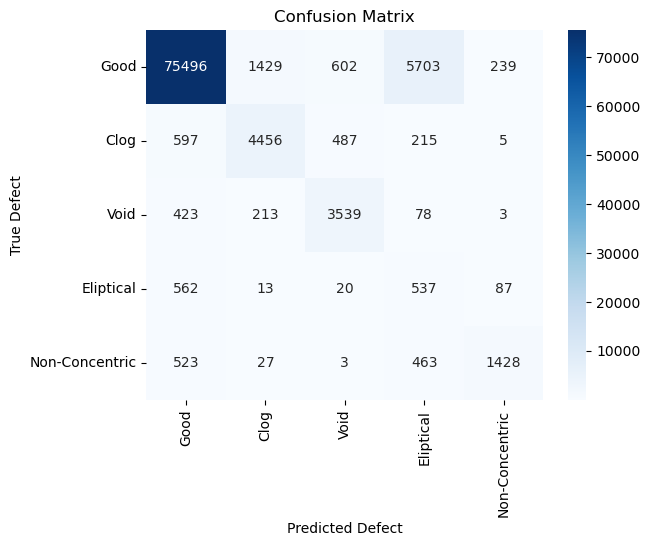

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define your true and predicted labels
true_labels = data['label']
predicted_labels = data['pred']

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap of the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', xticklabels=['Good', 'Clog', 'Void', 'Eliptical', 'Non-Concentric'], yticklabels=['Good', 'Clog', 'Void', 'Eliptical', 'Non-Concentric'])

# Set axis labels and title
plt.xlabel('Predicted Defect')
plt.ylabel('True Defect')
plt.title('Confusion Matrix')

# Display the plot
#plt.axis('equal')
plt.show()


1226

1068

In [6]:
cm_data = [675,
14,
2,
308,
1,
55,
828,
57,
52,
8,
54,
28,
874,
43,
1,
23,
1,
1,
841,
134,
17,
12,
0,
92,
879,]
true_labels = [np.zeros(np.sum(cm_data[0:5])), np.ones(np.sum(cm_data[5:10])), np.ones(np.sum(cm_data[10:15]))*2, np.ones(np.sum(cm_data[15:20]))*3, np.ones(np.sum(cm_data[20:25]))*4]

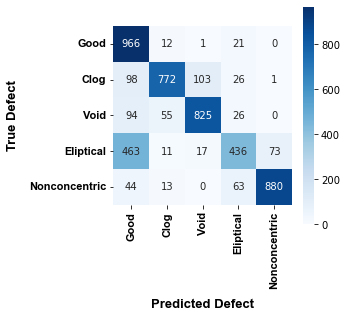

In [7]:
cm_data = [966,
12,
1,
21,
0,
98,
772,
103,
26,
1,
94,
55,
825,
26,
0,
463,
11,
17,
436,
73,
44,
13,
0,
63,
880,
]

true_labels = [np.zeros(np.sum(cm_data[0:5])), np.ones(np.sum(cm_data[5:10])), np.ones(np.sum(cm_data[10:15]))*2, np.ones(np.sum(cm_data[15:20]))*3, np.ones(np.sum(cm_data[20:25]))*4]

true_labels = np.array(true_labels).flatten()

predicted_labels = []

for idx in range(len(cm_data)):
    pred_class = idx % 5
    predicted_labels.extend(np.ones(cm_data[idx])*pred_class)

predicted_labels = np.array(predicted_labels).flatten()

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define your true and predicted labels

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# cm = confusion_matrix(label_array.cpu(), pred_array.cpu())

fig1, ax1 = plt.subplots(figsize=(4, 4))


# Create a heatmap of the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', xticklabels=['Good', 'Clog', 'Void', 'Eliptical', 'Nonconcentric'], yticklabels=['Good', 'Clog', 'Void', 'Eliptical', 'Nonconcentric'], square=True)


# Set axis labels and title

ax1.set_xlabel('Predicted Defect', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
ax1.set_ylabel('True Defect', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')

ax1.set_xticklabels(['Good', 'Clog', 'Void', 'Eliptical', 'Nonconcentric'], fontsize=11,  fontfamily='Arial', fontweight='bold')
ax1.set_yticklabels(['Good', 'Clog', 'Void', 'Eliptical', 'Nonconcentric'], fontsize=11,  fontfamily='Arial', fontweight='bold')

# Display the plot
# plt.axis('equal')
plt.show()
fig1.savefig('Accuracy.svg', format='svg', dpi=300, bbox_inches='tight')

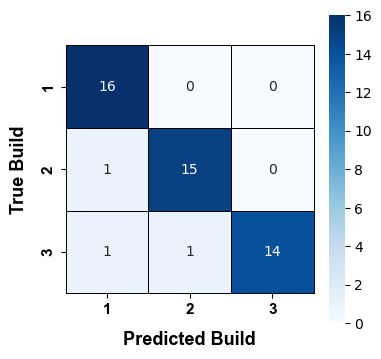

In [11]:
cm_data = [16, 0, 0,
           1, 15, 0,
           1, 1, 14]

true_labels = [np.zeros(np.sum(cm_data[0:3])), np.ones(np.sum(cm_data[3:6])), np.ones(np.sum(cm_data[6:9]))*2]

true_labels = np.array(true_labels).flatten()

predicted_labels = []

for idx in range(len(cm_data)):
    pred_class = idx % 3
    predicted_labels.extend(np.ones(cm_data[idx])*pred_class)

predicted_labels = np.array(predicted_labels).flatten()

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define your true and predicted labels

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# cm = confusion_matrix(label_array.cpu(), pred_array.cpu())

fig1, ax1 = plt.subplots(figsize=(4, 4))


# Create a heatmap of the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'], square=True, linecolor='black', linewidth=0.5, clip_on=False)


# Set axis labels and title

ax1.set_xlabel('Predicted Build', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
ax1.set_ylabel('True Build', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')

ax1.set_xticklabels(['1', '2', '3'], fontsize=11,  fontfamily='Arial', fontweight='bold')
ax1.set_yticklabels(['1', '2', '3'], fontsize=11,  fontfamily='Arial', fontweight='bold')

# Display the plot
# plt.axis('equal')
plt.show()
fig1.savefig('Accuracy.svg', format='svg', dpi=300, bbox_inches='tight')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall'])

# Calculate the accuracy, precision, recall, and F1 score of the model for each class
labels = ['Good', 'Clog', 'Void', 'Eliptical', 'Non-Concentric', 'Total']

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_norm.diagonal())
print(np.mean(cm_norm.diagonal()))

In [ ]:
accuracy_score(true_labels, predicted_labels)

# accuracy_score(label_array.cpu(), pred_array.cpu())

## Plotting

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_16976\2373810428.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_16976\2373810428.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


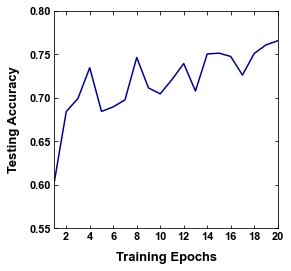

In [6]:
from matplotlib.ticker import FormatStrFormatter, MultipleLocator

fig1, ax1 = plt.subplots(figsize=(4, 4))


x = np.array(range(1,21))
y = [0.6046,0.6842,0.6994,0.7346,0.6844,0.6896,0.6976,0.7464,0.7114,0.7046,0.721,0.7394,0.7078,0.7504,0.7514,0.7476,0.7262,0.751,0.7608,0.7656
]

# x = [5, 10, 25, 50, 100, 200, 400, 800]
# y = [0.842, 0.863, 0.879, 0.897, 0.898, 0.91, 0.918, 0.927]


ax1.plot(x, y, label="Gaussian Process Regressor", c='darkblue')

ax1.set_xlabel('Training Epochs', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
ax1.set_ylabel('Testing Accuracy', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
#ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
ax1.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
#ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1.tick_params(direction='in', which='both')
ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_xlim([1, 20])
ax1.set_ylim([0.55, .8])

fig1.savefig('Accuracy.svg', format='svg', dpi=300, bbox_inches='tight')

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_49472\1450002639.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_49472\1450002639.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


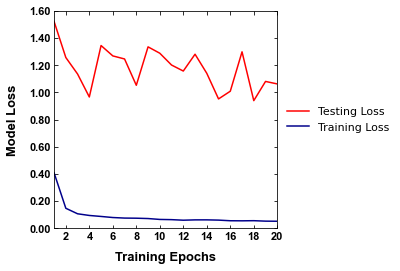

In [149]:
from matplotlib.ticker import FormatStrFormatter, MultipleLocator

fig1, ax1 = plt.subplots(figsize=(4, 4))


x = np.array(range(1,21))
train = [0.408188444356918,0.147400623607635,0.106795346326828,0.0945077402043342,0.0871746168065071,0.0792899361085891,0.0752127547264099,0.0742862760984897,0.071789797193408,0.0652332800912857,0.0636966375690698,0.0595910111951828,0.0619992900067567,0.0621080479514598,0.0602355107665062,0.0555861427819728,0.0550508324164152,0.0560245284944772,0.0526641193258762,0.0518768139672279
]

test = [1.52205179195404,1.25666456224471,1.13536007574051,0.966263354843855,1.3448319313541,1.2685450374294,1.24601790119335,1.05238144939132,1.33507735276427,1.28819315631762,1.2013506737573,1.15720158708039,1.28093908964097,1.14034179993364,0.952018273361772,1.00862163617219,1.2985505935315,0.939438841505534,1.08070522680338,1.06228647915124
]

# x = [5, 10, 25, 50, 100, 200, 400, 800]
# y = [0.842, 0.863, 0.879, 0.897, 0.898, 0.91, 0.918, 0.927]



ax1.plot(x, test, label="Testing Loss", c='red')
ax1.plot(x, train, label="Training Loss", c='darkblue')

ax1.set_xlabel('Training Epochs', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
ax1.set_ylabel('Model Loss', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
#ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
ax1.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
#ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.2))
ax1.tick_params(direction='in', which='both')
ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_xlim([1, 20])
ax1.set_ylim([0, 1.6])
ax1.legend(loc='center left', fontsize=11, frameon=False, ncol=1, bbox_to_anchor=(1.0, .5))

fig1.savefig('Accuracy.svg', format='svg', dpi=300, bbox_inches='tight')

## Evaluate Model Part Level Performance

In [3]:
import torch
device1 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import pandas as pd
import time

def test_model(model, dataloaders, image_datasets, criterion, wandb_name, wandb_id, c, epoch_end=False, ):
    model.to(device1)

    running_loss = 0.
    running_corrects = 0.
    model.eval()
    since = time.time()
    pred_array = torch.zeros(0, device=device1)
    label_array = torch.zeros(0, device=device1)
    outputs_array = torch.zeros(0, device=device1)

    for batch_id, (inputs, labels) in enumerate(dataloaders['val']):    #Added this line to evaluate model performance for multiple batches
    #for inputs, labels in dataloaders['val']:

        inputs, labels = inputs.to(device1), labels.to(device1)

        with torch.autograd.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds.view(-1) == labels.view(-1)).item()
        pred_array = torch.cat((pred_array, preds.view(-1)), 0)
        label_array = torch.cat((label_array, labels.view(-1)), 0)
        outputs_array = torch.cat((outputs_array, outputs.view(-1, 5)), 0)

    epoch_loss = running_loss / len(dataloaders['val'].dataset)
    epoch_acc = running_corrects / len(dataloaders['val'].dataset)
    time_elapsed = time.time() - since
    print("Training compete in {}m   {}s".format(time_elapsed // 60, time_elapsed % 60))
    print("{} Loss: {} Acc: {}".format('val', epoch_loss, epoch_acc))

    if epoch_end:
        df = pd.DataFrame(columns=['img', 'label', 'pred'])
        df.img = (np.array(image_datasets['val'].imgs)[:, 0])
        df.pred = pred_array.cpu()
        df.label = label_array.cpu()
        output_df = pd.DataFrame(outputs_array.cpu(), columns=['output_0', 'output_1', 'output_2', 'output_3', 'output_4'])
        df = df.join(output_df)
        pd.DataFrame(df).to_csv("C:/Users/bimrose2/Box/ZJU UIUC - CT Defect Detection/csv_outputs/" + str(c) + '_' + wandb_name + '_'+ wandb_id + ".csv")

    # model.load_state_dict(best_model_wts)
    return epoch_loss, epoch_acc, pred_array, label_array, df, outputs_array

In [4]:
# c = 'train_synthetic_test_real_10k_1k_3_sf3groqm'
c = 'train_synthetic_test_real_10k_1k_1_uto722ze'
wandb_name = 'test'
wandb_id = 'uto722ze'

data_dir = 'C:/Users/bimrose2/Desktop/ZJU UIUC - CT Defect Detection/Data/testing/test_parts' 
# model_path = 'C:/Users/bimrose2/Desktop/ZJU UIUC - CT Defect Detection/Models/'+ str(c) + '_' + wandb.run.id +  '.pth'
model_path = 'C:/Users/bimrose2/Desktop/ZJU UIUC - CT Defect Detection/Models/'+ str(c) + '.pth'

mean = 0.3151
std = 0.2432

# model_name = 'convnext_small'
# num_classes = 5
# feature_extract = True
# classifier_layer_config = 0
# lr = 0.0008307

model_name = 'vit_b_16'
num_classes = 5
feature_extract = True
classifier_layer_config = 0
lr = 0.00005296


model, input_size = resnet34.initialize_model(model_name, num_classes, feature_extract,
                                                            use_pretrained=True, freeze_layers=False, classifier_layer_config=classifier_layer_config)  # initialize_model returns: model_ft, input_size

model.load_state_dict(torch.load(model_path, map_location=torch.device(device1)))

if feature_extract:
    params_to_update = []
    for name, param in model.named_parameters():
        if param.requires_grad:
            params_to_update.append(param)
            print("\t", name)
else:
    for name, param in model.named_parameters():
        if param.requires_grad:
            print("\t", name)

optimizer_ft = optim.Adam(params_to_update, lr=lr)
criterion = nn.CrossEntropyLoss()

num_workers = 0


data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        #AddGaussianNoise(),
        transforms.GaussianBlur(5, sigma=(0.1, 1.0)),
        # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        transforms.Normalize([mean, mean, mean], [std, std, std])
    ]),
    "val": transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        #transforms.GaussianBlur(5, sigma=(0.1, 1.0)),
        # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        transforms.Normalize([mean, mean, mean], [std, std, std])
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['val']}

batch_size = 128

dataloaders_dict = {'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)}

epoch_loss, epoch_acc, pred_array, label_array, df, outputs_array = test_model(model, dataloaders_dict, image_datasets, criterion, wandb_name, wandb_id, c, epoch_end=True)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/bimrose2/Desktop/ZJU UIUC - CT Defect Detection/Models/train_synthetic_test_real_10k_1k_1_uto722ze.pth'

## Plotting Specific Parts

In [270]:
csv_path = 'C:/Users/bimrose2/Box/ZJU UIUC - CT Defect Detection/csv_outputs'
test_list = os.listdir('C:/Users/bimrose2/Box/ZJU UIUC - CT Defect Detection/csv_outputs')

#file_name = 'train_synthetic_test_real_10k_1k_3_sf3groqm_test_sf3groqm.csv' #ConvNext
file_name = 'train_synthetic_test_real_10k_1k_1_uto722ze_test_uto722ze.csv' #ViT
#file_name = 'train_synthetic_test_real_10k_1k_4_64q3n6to_test_64q3n6to.csv' #EfficientNet

test_list[500]

'eternal-sweep-78_ijw16gp1.csv'

In [271]:
data = pd.read_csv(csv_path + '/' + file_name)
data['Part'] = data.img.str.split('\\').str[-1].str.split('_').str[0]
data['Slice'] = data.img.str.split('\\').str[-1].str.split('_').str[3]
data['Defect'] = data.img.str.split('\\').str[-1].str.split('_').str[2]

In [272]:
data[data.Defect == 'good']

,Unnamed: 0,img,label,pred,output_0,output_1,output_2,output_3,output_4,Part,Slice,Defect
74678,74678,C:/Users/bimrose2/Desktop/ZJU UIUC - CT Defect...,0.0,0.0,-0.000566,-7.890373,-9.332238,-9.317311,-11.261054,239,000,good
74679,74679,C:/Users/bimrose2/Desktop/ZJU UIUC - CT Defect...,0.0,0.0,-0.000677,-7.711255,-8.961478,-9.326261,-11.345942,239,001,good
74680,74680,C:/Users/bimrose2/Desktop/ZJU UIUC - CT Defect...,0.0,0.0,-0.000622,-7.888260,-9.102426,-9.052479,-10.896480,239,002,good
74681,74681,C:/Users/bimrose2/Desktop/ZJU UIUC - CT Defect...,0.0,0.0,-0.000726,-7.521297,-9.245065,-9.485577,-11.335233,239,003,good
74682,74682,C:/Users/bimrose2/Desktop/ZJU UIUC - CT Defect...,0.0,0.0,-0.000635,-7.847973,-8.829646,-9.374979,-11.232367,239,004,good
...,...,...,...,...,...,...,...,...,...,...,...,...
89224,89224,C:/Users/bimrose2/Desktop/ZJU UIUC - CT Defect...,1.0,1.0,-5.648268,-0.004350,-7.699000,-9.119568,-8.278142,255,244,good
89225,89225,C:/Users/bimrose2/Desktop/ZJU UIUC - CT Defect...,1.0,1.0,-4.059165,-0.030945,-4.413188,-7.712649,-7.348428,255,245,good
89226,89226,C:/Users/bimrose2/Desktop/ZJU UIUC - CT Defect...,1.0,1.0,-5.091373,-0.013315,-5.019558,-8.299362,-8.417096,255,246,good
89227,89227,C:/Users/bimrose2/Desktop/ZJU UIUC - CT Defect...,1.0,1.0,-5.072675,-0.008237,-6.387147,-8.771132,-9.219359,255,247,good


In [273]:
data['Defect'].unique()

array(['A', 'B', 'C', 'D', 'E', 'clog1', 'hole', 'blob', 'ConeClog12',
       'BlobVoid12', 'BlobClog12', 'ConeVoid12', 'SphereClog12',
       'SphereVoid12', 'SpikyClog12', 'CylinderVoid12', 'SpikyVoid12',
       'CylinderClog12', 'RectClog12', 'RectVoid12', 'Ellipticity250',
       'Bending', 'DNotch1mm', 'ConeClog1mm', 'RectClog1mm',
       'SphereClog1mm', 'BHole1mm', 'Concentricity', 'CBlob4mm',
       'AClog1mm', 'CBlob1mm', 'AClog4mm', 'BHole4mm', 'EClog21mm',
       'EClog24mm', 'CylinderVoid1mm', 'SphereVoid1mm', 'Ellipticity',
       'DNotch4mm', 'CylinderClog1mm', 'SpikyVoid1mm', 'Ellipticity250um',
       'ConeVoid1mm', 'Bending1deg', 'SpikyClog1mm', 'RectVoid1mm',
       'BlobClog1mm', 'BlobVoid1mm', 'good'], dtype=object)

In [274]:
data.Part.unique()

array(['032', '033', '034', '035', '036', '037', '038', '039', '040',
       '041', '042', '043', '044', '045', '046', '047', '048', '049',
       '050', '051', '052', '053', '054', '055', '056', '057', '058',
       '059', '060', '061', '062', '063', '064', '065', '066', '067',
       '068', '069', '070', '071', '072', '073', '074', '075', '076',
       '077', '078', '079', '080', '081', '082', '083', '084', '085',
       '086', '087', '088', '089', '090', '091', '092', '093', '094',
       '095', '096', '097', '098', '099', '100', '101', '102', '103',
       '104', '105', '106', '107', '108', '109', '110', '111', '112',
       '113', '114', '115', '116', '117', '118', '119', '120', '121',
       '122', '123', '124', '125', '126', '127', '128', '129', '130',
       '131', '132', '133', '134', '135', '136', '137', '138', '139',
       '140', '141', '142', '143', '144', '145', '146', '147', '148',
       '149', '150', '151', '152', '153', '154', '155', '156', '157',
       '158', '159',

In [275]:
import scipy.special
from matplotlib.ticker import FormatStrFormatter, MultipleLocator

data = pd.read_csv(csv_path + '/' + file_name)
data['Part'] = data.img.str.split('\\').str[-1].str.split('_').str[0]
data['Slice'] = data.img.str.split('\\').str[-1].str.split('_').str[3]
data['Defect'] = data.img.str.split('\\').str[-1].str.split('_').str[2]

#excluded_parts = ['Bending', 'Bending1deg', 'Concentricity', 'Ellipticity', 'Ellipticity250', 'Ellipticity250um', ]
excluded_parts = ['Bending', 'Bending1deg', 'good']

full_defect_df = pd.DataFrame(columns=['defect', 'center', 'width', 'confidence', 'part'])

defect_labels = ['Good', 'Clog', 'Void', 'Ellipticity', 'Concentricity']

part_list = []

for part in data['Part'].unique():
    part_data = data[data.Part == part]
    # if (int(part) == 255) & (part_data['Defect'].unique()[0] not in excluded_parts): ##Add more of a filter here
    if (part_data['Defect'].unique()[0] not in excluded_parts): ##Add more of a filter here
        

        print(part + ' ' + part_data['Defect'].unique())
        # print('Defect ' + data.Defect[data.Part == part].unique()[0])

        part_list.append(part)

        part_data = part_data.sort_values(by=['Slice'])

        good_signal = part_data['output_0'].values
        clog_signal = part_data['output_1'].values
        void_signal = part_data['output_2'].values
        ellipticity_signal = part_data['output_3'].values
        concentricity_signal = part_data['output_4'].values

        output = np.array([good_signal, clog_signal, void_signal, ellipticity_signal, concentricity_signal])

        #Add softmax if necessary
        #output = scipy.special.softmax(output, axis=0)
        #Convert logsoftmax to softmax if necessary
        output = np.exp(output)

        ## Max Defect Response of Consecutive Slices

        defect = np.argmax(output, axis=0)

        gap_tolerance = 5

        defect_df = pd.DataFrame(columns=['defect', 'center', 'width', 'confidence'])

        defect_index = []
        defect_confidence = []

        prev_defect = 0
        prev_defect_index = -gap_tolerance

        for idx in range(len(defect)):
            if defect[idx] != 0:
                if ((idx - prev_defect_index) >= gap_tolerance) | (prev_defect != defect[idx]):
                    if len(defect_index) > 0:
                        defect_df = pd.concat([defect_df, pd.DataFrame({'defect': [defect_labels[prev_defect]], 'center': [int(np.mean(defect_index))], 'width': [(max(defect_index) - min(defect_index) + 1)], 'confidence': [np.sum(defect_confidence)]})])
                    defect_index = []
                    defect_confidence = []
                    defect_index.append(idx)
                    defect_confidence.append(output[defect[idx], idx])

                elif prev_defect == defect[idx]:
                    defect_index.append(idx)
                    defect_confidence.append(output[defect[idx], idx])
                    prev_defect_index = idx
                    prev_defect = defect[idx]

                prev_defect_index = idx
                prev_defect = defect[idx]

        if len(defect_index) > 0:
            defect_df = pd.concat([defect_df, pd.DataFrame({'defect': [defect_labels[prev_defect]], 'center': [int(np.mean(defect_index))], 'width': [(max(defect_index) - min(defect_index) + 1)], 'confidence': [np.sum(defect_confidence)]})])
            defect_df = defect_df[defect_df.confidence > 0.9] #Not sure if I should keep this yet

        filtered_defect_df = defect_df[defect_df.confidence > 0.5]
        #filtered_defect_df = filtered_defect_df[filtered_defect_df.width > 2]
        filtered_defect_df.sort_values(by=['confidence'], ascending=False, inplace=True, ignore_index=True)
        # print('Max Defect Response of Consecutive Slices')
        # print(filtered_defect_df)

        # Find Peak in Defect Response

        # from scipy.signal import savgol_filter, find_peaks
        # defect_df = pd.DataFrame(columns=['defect', 'center', 'width', 'confidence'])
        # defect_labels = ['Good', 'Clog', 'Void', 'Concentricity', 'Ellipticity']

        # for idp in range(1, 5):

        #     signal_dict = scipy.signal.find_peaks(output[idp,: ], height=0.5, width=1)
        #     single_defect_df = pd.DataFrame(columns=['defect', 'center', 'width', 'confidence'])
        #     for peak_index in range(len(signal_dict[1]['width_heights'])):
        #         left_start = signal_dict[1]['left_ips'][peak_index]
        #         right_start = signal_dict[1]['right_ips'][peak_index]
        #         peak_height = signal_dict[1]['peak_heights'][peak_index]
        #         single_defect_df = pd.concat([single_defect_df, pd.DataFrame({'defect': [defect_labels[idp]], 'center': [int((right_start + left_start)/2)], 'width': [int(right_start-left_start)], 'confidence': [peak_height*(right_start-left_start)]})])

        #     single_defect_df.sort_values(by=['width'], ascending=False, inplace=True, ignore_index=True)
        #     step_through_peaks = True
        #     idn = 0
        #     if single_defect_df.shape[0] > 1:
        #         while step_through_peaks:
        #             overlap_index = single_defect_df[(single_defect_df['center'] > single_defect_df['center'].iloc[idn] - single_defect_df['width'].iloc[idn]/2) & (single_defect_df['center'] < single_defect_df['center'].iloc[idn] + single_defect_df['width'].iloc[idn]/2)].index[1:]
        #             if overlap_index.size > 1:
        #                 single_defect_df.drop(overlap_index, inplace=True)
        #             idn += 1
        #             if idn == single_defect_df.shape[0]:
        #                 step_through_peaks = False
        #     defect_df = pd.concat([defect_df, single_defect_df])
            
        # defect_df.sort_values(by=['confidence'], ascending=False, inplace=True, ignore_index=True)
        # print('\nFind Peak in Defect Response')
        # print(defect_df)

        ## Plot Defect Response

        # for idx in range(5):
        #     fig1, ax1 = plt.subplots(figsize=(5, 3))
        #     alpha = [0.25, 0.25, 0.25, 0.25, 0.25]
        #     alpha[idx] = 1
        #     ax1.plot(np.array(part_data['Slice']).astype(int), output[0, :], label='Good', alpha=alpha[0])
        #     ax1.plot(np.array(part_data['Slice']).astype(int), output[1, :], label='Clog', alpha=alpha[1])
        #     ax1.plot(np.array(part_data['Slice']).astype(int), output[2, :], label='Void', alpha=alpha[2])
        #     ax1.plot(np.array(part_data['Slice']).astype(int), output[3, :], label='Ellipticity', alpha=alpha[3])
        #     ax1.plot(np.array(part_data['Slice']).astype(int), output[4, :], label='Concentricity', alpha=alpha[4])

        #     defect_loc = np.array(part_data['Slice'][part_data['label'] == idx]).astype(int)
        #     ax1.set_ylim(ax1.get_ylim())
        #     if (defect_loc.size > 0) & (idx != 0):
        #         for i in range(defect_loc.size - 1):
        #             ax1.fill_between((defect_loc[i] - 0.5, defect_loc[i] + 0.5), ax1.get_ylim()[0] , ax1.get_ylim()[1], alpha=.1, color='gray')
        #         ax1.fill_between((defect_loc[defect_loc.size-1] - 0.5, defect_loc[defect_loc.size-1] + 0.5), ax1.get_ylim()[0] , ax1.get_ylim()[1], alpha=.1, color='gray', label='Defect Location')


        #     ax1.set_xlabel('Slice', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
        #     ax1.set_ylabel('Softmax Output', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
        #     ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
        #     #ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
        #     ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
        #     #ax1.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
        #     #ax1.xaxis.set_minor_locator(MultipleLocator(1))
        #     ax1.xaxis.set_major_locator(MultipleLocator(50))
        #     ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
        #     ax1.tick_params(direction='in', which='both')
        #     ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
        #     ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
        #     ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        #     ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        #     ax1.set_xlim(0, len(part_data))
        #     ax1.legend(loc='center left', fontsize=11, frameon=False, ncol=1, bbox_to_anchor=(1.0, .5))

        #     fig1.savefig(str(defect_labels[idx]) + '.svg', format='svg', dpi=300, bbox_inches='tight')

        #     plt.show()

        full_defect_df = pd.concat([full_defect_df, pd.DataFrame({'defect': defect_df.defect, 'center': defect_df.center, 'width': defect_df.width, 'confidence': defect_df.confidence, 'part': part})])

['032 A']
['033 A']
['034 A']
['035 A']
['036 A']
['037 A']
['038 A']
['039 A']
['040 A']
['041 A']
['042 B']
['043 B']
['044 B']
['045 B']
['046 B']
['047 B']
['048 B']
['049 B']
['050 B']
['051 B']
['052 C']
['053 C']
['054 C']
['055 C']
['056 C']
['057 C']
['058 C']
['059 C']
['060 C']
['061 C']
['062 C']
['063 D']
['064 D']
['065 D']
['066 D']
['067 D']
['068 D']
['069 D']
['070 D']
['071 D']
['072 D']
['073 E']
['074 E']
['075 E']
['076 E']
['077 E']
['078 E']
['079 E']
['080 E']
['081 E']
['082 E']
['083 clog1']
['084 clog1']
['085 clog1']
['086 clog1']
['087 clog1']
['088 clog1']
['089 clog1']
['090 clog1']
['091 hole']
['092 hole']
['093 hole']
['094 hole']
['095 hole']
['096 hole']
['097 blob']
['098 blob']
['099 blob']
['100 blob']
['101 D']
['102 B']
['103 E']
['104 B']
['105 E']
['106 A']
['107 E']
['108 C']
['109 D']
['110 D']
['111 D']
['112 E']
['113 C']
['114 B']
['115 A']
['116 E']
['117 B']
['118 D']
['119 E']
['120 A']
['121 D']
['122 B']
['123 A']
['124 C']
['125 C'

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3749119980.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3749119980.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


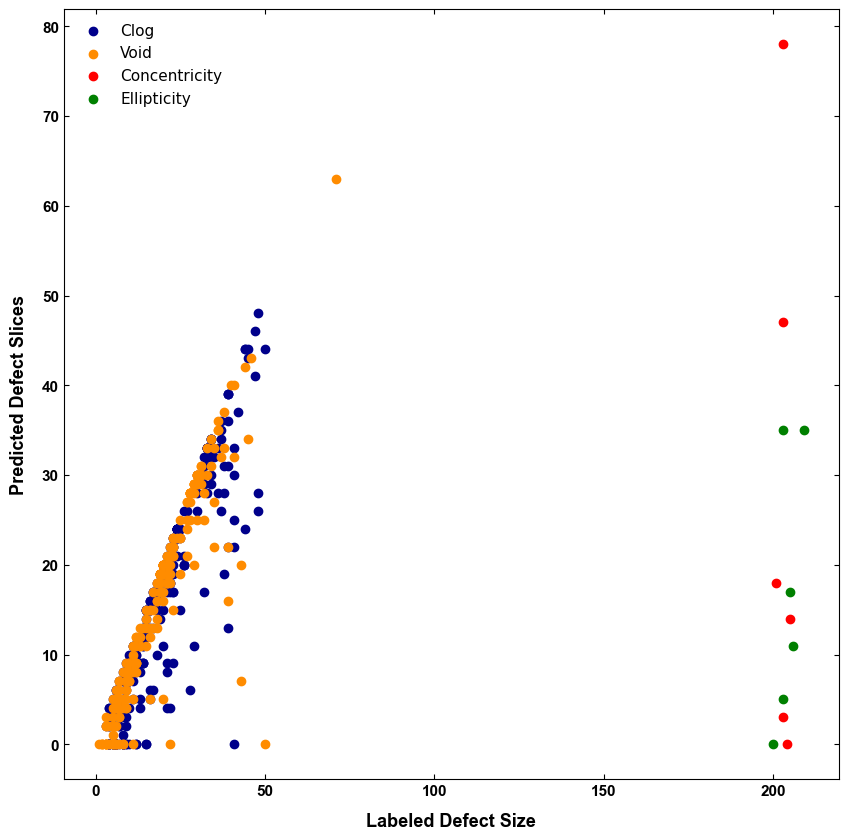

In [210]:
from itertools import groupby

defect_labels = ['Good', 'Clog', 'Void', 'Concentricity', 'Ellipticity']

def extract_seq(seq):
    return [
        [x for _, x in g]
        for k, g in groupby(
            enumerate(seq), 
            lambda i_x : i_x[0] - i_x[1]
        )
    ]

defect_size = []
defect_detected_size = []
defect_label = []

for part in part_list:#data.Part.unique():
    part_data = data[data['Part'] == part]
    defect_data = full_defect_df[full_defect_df['part'] == part]
    labeled_defect = part_data[part_data.label != 0]

    for idx in range(1,5):
        labeled_defect_idx = labeled_defect[labeled_defect['label'] == idx]
        labeled_defect_list = extract_seq(np.array(labeled_defect_idx.Slice).astype(int))
        defect_to_check = defect_data[defect_data.defect == defect_labels[idx]]
        for defect in labeled_defect_list:
            defect_size.append(len(defect))
            defective_slices_detected = 0
            defect_label.append(idx)
            for center, width in zip(defect_to_check.center, defect_to_check.width):
                check_range = np.arange(center - width/2, center + width/2).astype(int) + 1
                intersection = (np.intersect1d(defect, check_range))
                defective_slices_detected += len(intersection)
                if len(np.intersect1d(defect, check_range)) > 0:
                    for inter in intersection:
                        defect = np.delete(defect, np.where(defect == inter))
            defect_detected_size.append(defective_slices_detected)
    
fig1, ax1 = plt.subplots(figsize=(10, 10))

defect_detection_data = pd.DataFrame({'defect_size': defect_size, 'defect_detected_size': defect_detected_size, 'defect_label': defect_label})

ax1.scatter(defect_detection_data[defect_detection_data.defect_label == 1].defect_size, defect_detection_data[defect_detection_data.defect_label == 1].defect_detected_size, c='darkblue', label='Clog')
ax1.scatter(defect_detection_data[defect_detection_data.defect_label == 2].defect_size, defect_detection_data[defect_detection_data.defect_label == 2].defect_detected_size, c='darkorange', label='Void')
ax1.scatter(defect_detection_data[defect_detection_data.defect_label == 3].defect_size, defect_detection_data[defect_detection_data.defect_label == 3].defect_detected_size, c='red', label='Concentricity')
ax1.scatter(defect_detection_data[defect_detection_data.defect_label == 4].defect_size, defect_detection_data[defect_detection_data.defect_label == 4].defect_detected_size, c='green', label='Ellipticity')


ax1.set_xlabel('Labeled Defect Size', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
ax1.set_ylabel('Predicted Defect Slices', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
#ax1.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
ax1.legend(loc='upper right', fontsize=11, frameon=False)
#ax1.xaxis.set_minor_locator(MultipleLocator(1))
#ax1.xaxis.set_major_locator(MultipleLocator(2))
#ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1.tick_params(direction='in', which='both')
ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
# ax1.set_xlim([-.5, 2.5])
# ax1.set_ylim([0.6, 1])
#ax1.set_aspect('equal', 'box')
ax1.legend(['Clog', 'Void', 'Concentricity', 'Ellipticity'], loc='upper left', fontsize=11, frameon=False)

fig1.savefig('Accuracy.svg', format='svg', dpi=300, bbox_inches='tight')

In [276]:
## Table for defect detection by size

defect_labels = ['Good', 'Clog', 'Void', 'Concentricity', 'Ellipticity']

multi_defect_sizes = np.array([4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

def extract_seq(seq):
    return [
        [x for _, x in g]
        for k, g in groupby(
            enumerate(seq), 
            lambda i_x : i_x[0] - i_x[1]
        )
    ]

defect_size = []
defect_size_actual = []
defect_detected_size = []
defect_label = []

for part in part_list:#data.Part.unique():
    part_data = data[data['Part'] == part]
    defect_data = full_defect_df[full_defect_df['part'] == part]
    labeled_defect = part_data[part_data.label != 0]

    # print(part + ' ' + part_data['Defect'].unique())

    multi_defect = False

    natural_defect = True

    if int(part) <= 155:
        defect_size_actual_part = 2
        print(part + ' ' + part_data['Defect'].unique(), 2.0)

    elif part_data['Defect'].unique()[0][-3:] == '1mm':
        defect_size_actual_part = 1
        print(part + ' ' + part_data['Defect'].unique(), 1.0)

    elif part_data['Defect'].unique()[0][-2:] == '12':
        multi_defect = True
        natural_defect = False
    
    elif part_data['Defect'].unique()[0][-3:] == '4mm':
        defect_size_actual_part = 4
        print(part + ' ' + part_data['Defect'].unique(), 4.0)

    else:
        defect_size_actual_part = 100
        print(part + ' ' + part_data['Defect'].unique(), 100.0)

    num_defects = 0


    for idx in range(1,5):
        labeled_defect_idx = labeled_defect[labeled_defect['label'] == idx]
        labeled_defect_list = extract_seq(np.array(labeled_defect_idx.Slice).astype(int))
        defect_to_check = defect_data[defect_data.defect == defect_labels[idx]]
        # print(labeled_defect_list)
        defect_size_part = []
        for defect in labeled_defect_list:
            defect_size.append(len(defect))

            defect_size_part.append(len(defect))
            
            defective_slices_detected = 0
            defect_label.append(idx)
            for center, width in zip(defect_to_check.center, defect_to_check.width):
                check_range = np.arange(center - width/2, center + width/2).astype(int) + 1
                intersection = (np.intersect1d(defect, check_range))
                defective_slices_detected += len(intersection)
                if len(np.intersect1d(defect, check_range)) > 0:
                    for inter in intersection:
                        defect = np.delete(defect, np.where(defect == inter))
            defect_detected_size.append(defective_slices_detected)
            num_defects += 1
            if not multi_defect:
                if num_defects > 1:
                    defect_size_actual.append(1)
                else:
                    defect_size_actual.append(defect_size_actual_part)
        
        if multi_defect:
            #print(defect_size_part)

            sorted_index = np.argsort(defect_size_part)[::-1]

            part_defect_size_actual = np.zeros(len(sorted_index))

            for idx in range(len(sorted_index)):
                part_defect_size_actual[sorted_index[idx]] = multi_defect_sizes[idx]

            defect_size_actual.extend(part_defect_size_actual)
            #print(part + ' ' + part_data['Defect'].unique(), part_defect_size_actual)

        # if natural_defect & (len(defect_size_part) >= 1):
        #     print('natural defect', defect_size_part)
        #     defect_array = np.ones(len(defect_size_part)-1)
        #     defect_size_actual.extend(defect_array)

    

['032 A'] 2.0
['033 A'] 2.0
['034 A'] 2.0
['035 A'] 2.0
['036 A'] 2.0
['037 A'] 2.0
['038 A'] 2.0
['039 A'] 2.0
['040 A'] 2.0
['041 A'] 2.0
['042 B'] 2.0
['043 B'] 2.0
['044 B'] 2.0
['045 B'] 2.0
['046 B'] 2.0
['047 B'] 2.0
['048 B'] 2.0
['049 B'] 2.0
['050 B'] 2.0
['051 B'] 2.0
['052 C'] 2.0
['053 C'] 2.0
['054 C'] 2.0
['055 C'] 2.0
['056 C'] 2.0
['057 C'] 2.0
['058 C'] 2.0
['059 C'] 2.0
['060 C'] 2.0
['061 C'] 2.0
['062 C'] 2.0
['063 D'] 2.0
['064 D'] 2.0
['065 D'] 2.0
['066 D'] 2.0
['067 D'] 2.0
['068 D'] 2.0
['069 D'] 2.0
['070 D'] 2.0
['071 D'] 2.0
['072 D'] 2.0
['073 E'] 2.0
['074 E'] 2.0
['075 E'] 2.0
['076 E'] 2.0
['077 E'] 2.0
['078 E'] 2.0
['079 E'] 2.0
['080 E'] 2.0
['081 E'] 2.0
['082 E'] 2.0
['083 clog1'] 2.0
['084 clog1'] 2.0
['085 clog1'] 2.0
['086 clog1'] 2.0
['087 clog1'] 2.0
['088 clog1'] 2.0
['089 clog1'] 2.0
['090 clog1'] 2.0
['091 hole'] 2.0
['092 hole'] 2.0
['093 hole'] 2.0
['094 hole'] 2.0
['095 hole'] 2.0
['096 hole'] 2.0
['097 blob'] 2.0
['098 blob'] 2.0
['099 

In [241]:
## Size Accuracy Calculation

defect_size_data = pd.DataFrame({'defect_size': defect_size, 'defect_detected_size': defect_detected_size, 'defect_label': defect_label, 'defect_size_actual': defect_size_actual})

for sized_defect in defect_size_data.defect_size_actual.unique():
    defect_set_size = defect_size_data[defect_size_data.defect_size_actual == sized_defect]
    defect_size_all = np.sum(defect_set_size.defect_size)
    defect_detected_size_all = np.sum(defect_set_size.defect_detected_size)
    print(sized_defect, defect_detected_size_all/defect_size_all)
    

2.0 0.7839638865004299
1.0 0.6163967611336032
4.0 0.7982435867806794
100.0 0.05603271983640082


In [194]:
data.Defect.unique()

array(['A', 'B', 'C', 'D', 'E', 'clog1', 'hole', 'blob', 'ConeClog12',
       'BlobVoid12', 'BlobClog12', 'ConeVoid12', 'SphereClog12',
       'SphereVoid12', 'SpikyClog12', 'CylinderVoid12', 'SpikyVoid12',
       'CylinderClog12', 'RectClog12', 'RectVoid12', 'Ellipticity250',
       'Bending', 'DNotch1mm', 'ConeClog1mm', 'RectClog1mm',
       'SphereClog1mm', 'BHole1mm', 'Concentricity', 'CBlob4mm',
       'AClog1mm', 'CBlob1mm', 'AClog4mm', 'BHole4mm', 'EClog21mm',
       'EClog24mm', 'CylinderVoid1mm', 'SphereVoid1mm', 'Ellipticity',
       'DNotch4mm', 'CylinderClog1mm', 'SpikyVoid1mm', 'Ellipticity250um',
       'ConeVoid1mm', 'Bending1deg', 'SpikyClog1mm', 'RectVoid1mm',
       'BlobClog1mm', 'BlobVoid1mm', 'good'], dtype=object)

In [242]:
Elip_images = len(data[(data.label == 3)])
Elip_detected = len(data[(data.label == 3) & (data.pred == 3)])

print(Elip_detected/Elip_images)

0.44052502050861364


In [243]:
Con_images = len(data[(data.Defect == 'Concentricity') & (data.label == 4)])
Con_detected = len(data[(data.Defect == 'Concentricity') & (data.label == 4) & (data.pred == 4)])

print(Con_detected/Con_images)

0.8711256117455138


In [244]:
feature_defect_detection = (Con_detected+Elip_detected) / (Con_images+Elip_images)
print(feature_defect_detection)

0.656441717791411


In [286]:
data.Defect.unique()

array(['A', 'B', 'C', 'D', 'E', 'clog1', 'hole', 'blob', 'ConeClog12',
       'BlobVoid12', 'BlobClog12', 'ConeVoid12', 'SphereClog12',
       'SphereVoid12', 'SpikyClog12', 'CylinderVoid12', 'SpikyVoid12',
       'CylinderClog12', 'RectClog12', 'RectVoid12', 'Ellipticity250',
       'Bending', 'DNotch1mm', 'ConeClog1mm', 'RectClog1mm',
       'SphereClog1mm', 'BHole1mm', 'Concentricity', 'CBlob4mm',
       'AClog1mm', 'CBlob1mm', 'AClog4mm', 'BHole4mm', 'EClog21mm',
       'EClog24mm', 'CylinderVoid1mm', 'SphereVoid1mm', 'Ellipticity',
       'DNotch4mm', 'CylinderClog1mm', 'SpikyVoid1mm', 'Ellipticity250um',
       'ConeVoid1mm', 'Bending1deg', 'SpikyClog1mm', 'RectVoid1mm',
       'BlobClog1mm', 'BlobVoid1mm', 'good'], dtype=object)

In [299]:
## Morphology Analysis

void_y_morphology = data[data.Defect.isin(['B', 'D', 'SphereVoid12', 'DNotch1mm', 'BHole1mm', 'BHole4mm', 'DNotch1mm', 'DNotch4mm', 'SphereVoid1mm'])]
# void_n_morphology = data[data.Defect in []]
void_y_images = len(void_y_morphology[void_y_morphology.label == 2])
void_y_detected = len(void_y_morphology[(void_y_morphology.label == 2) & (void_y_morphology.pred == 2)])
void_y_false_detected = len(void_y_morphology[(void_y_morphology.label != 2) & (void_y_morphology.pred == 2)])
print('Void Yes Morphology:', void_y_detected/(void_y_images + void_y_false_detected))

void_n_morphology = data[data.Defect.isin(['BlobVoid12', 'ConeVoid12', 'RectVoid12', 'CylinderVoid1mm', 'SpikyVoid1mm', 'SpikyVoid12', 'CylinderVoid12', 'ConeVoid1mm', 'RectVoid1mm', 'BlobVoid1mm'])]
void_n_images = len(void_n_morphology[void_n_morphology.label == 2])
void_n_detected = len(void_n_morphology[(void_n_morphology.label == 2) & (void_n_morphology.pred == 2)])
void_n_false_detected = len(void_n_morphology[(void_n_morphology.label != 2) & (void_n_morphology.pred == 2)])
print('Void No Morphology:', void_n_detected/(void_n_images + void_n_false_detected))

clog_y_morphology = data[data.Defect.isin(['A', 'C', 'E', 'clog1', 'blob', 'SphereClog12', 'SphereClog1mm', 'AClog1mm', 'AClog4mm', 'CBlob1mm', 'CBlob4mm', 'EClog21mm', 'EClog24mm'])]
clog_y_images = len(clog_y_morphology[clog_y_morphology.label == 1])
clog_y_detected = len(clog_y_morphology[(clog_y_morphology.label == 1) & (clog_y_morphology.pred == 1)])
clog_y_false_detected = len(clog_y_morphology[(clog_y_morphology.label != 1) & (clog_y_morphology.pred == 1)])
print('Clog Yes Morphology:', clog_y_detected/(clog_y_images + clog_y_false_detected))

clog_n_morphology = data[data.Defect.isin(['ConeClog12', 'BlobClog12', 'SpikyClog12', 'CylinderClog12', 'RectClog12', 'ConeClog1mm', 'RectClog1mm', 'CylinderClog1mm', 'SpikyClog1mm', 'BlobClog1mm'])]
clog_n_images = len(clog_n_morphology[clog_n_morphology.label == 1])
clog_n_detected = len(clog_n_morphology[(clog_n_morphology.label == 1) & (clog_n_morphology.pred == 1)])
clog_n_false_detected = len(clog_n_morphology[(clog_n_morphology.label != 1) & (clog_n_morphology.pred == 1)])
print('Clog No Morphology:', clog_n_detected/(clog_n_images + clog_n_false_detected))

Void Yes Morphology: 0.8298192771084337
Void No Morphology: 0.7448501872659176
Clog Yes Morphology: 0.7026729126481124
Clog No Morphology: 0.6864374763883642


In [290]:

void_y_images

1919

## Selecting Threshold for Defects

In [245]:
from itertools import groupby

defect_labels = ['Good', 'Clog', 'Void', 'Concentricity', 'Ellipticity']

full_defect_df['Overlap_With_Real'] = 0

def extract_seq(seq):
    return [
        [x for _, x in g]
        for k, g in groupby(
            enumerate(seq), 
            lambda i_x : i_x[0] - i_x[1]
        )
    ]

defect_part = []
defect_size = []
defect_detected_size = []
defect_label = []
defect_confidence = []

for part in part_list:#data.Part.unique():
    part_data = data[data['Part'] == part]
    defect_data = full_defect_df[full_defect_df['part'] == part]
    labeled_defect = part_data[part_data.label != 0]

    for idx in range(1,5):
        labeled_defect_idx = labeled_defect[labeled_defect['label'] == idx]
        labeled_defect_list = extract_seq(np.array(labeled_defect_idx.Slice).astype(int))
        defect_to_check = defect_data[defect_data.defect == defect_labels[idx]]
        for defect in labeled_defect_list:
            if int(part) <= 155:
                defect_size_actual.append(2.0)

            elif part_data['Defect'].unique()[0][-3:] == '1mm':
                defect_size_actual.append(1.0)

            elif part_data['Defect'].unique()[0][-2:] == '12':
                multi_defect = True
            
            else:
                defect_size_actual.append(100.0)
            defect_part.append(part_data['Defect'].unique()[0])
            defect_size.append(len(defect))
            defective_slices_detected = 0
            defect_label.append(idx)
            defect_confidence_total = 0
            for center, width, confidence in zip(defect_to_check.center, defect_to_check.width, defect_to_check.confidence):
                check_range = np.arange(center - width/2, center + width/2).astype(int) + 1
                intersection = (np.intersect1d(defect, check_range))
                defective_slices_detected += len(intersection)
                if len(np.intersect1d(defect, check_range)) > 0:
                    for inter in intersection:
                        defect = np.delete(defect, np.where(defect == inter))
                    defect_confidence_total += (confidence / width) * len(intersection)
                    full_defect_df['Overlap_With_Real'][(full_defect_df.center == center) & (full_defect_df.width == width) & (full_defect_df.confidence == confidence)] = len(intersection)
            defect_detected_size.append(defective_slices_detected)
            defect_confidence.append(defect_confidence_total)


defect_detection_data = pd.DataFrame({'defect_size': defect_size, 'defect_detected_size': defect_detected_size, 'defect_confidence': defect_confidence, 'defect_label': defect_label, 'defect_part': defect_part})

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3030728971.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_defect_df['Overlap_With_Real'][(full_defect_df.center == center) & (full_defect_df.width == width) & (full_defect_df.confidence == confidence)] = len(intersection)
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3030728971.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_defect_df['Overlap_With_Real'][(full_defect_df.center == center) & (full_defect_df.width == width) & (full_defect_df.confidence == confidence)] = len(intersection)
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3030

In [181]:
defect_detection_data[defect_detection_data.defect_label == 3]

,defect_size,defect_detected_size,defect_confidence,defect_label,defect_part
478,205,0,0.000000,3,Ellipticity250
497,201,2,0.965545,3,Ellipticity
500,203,20,11.089350,3,Ellipticity
501,203,44,28.092456,3,Ellipticity
508,204,0,0.000000,3,Ellipticity250um
509,203,0,0.000000,3,Ellipticity250um


In [127]:
np.array(defect_detection_data.defect_size)

array([ 24,  24,  24,  24,  24,  24,  25,  24,  23,  24,  29,  29,  28,
        28,  27,  29,  28,  28,  28,  28,  16,  18,  10,  14,  18,  15,
        19,  17,  17,  16,  16,  20,  19,  20,  19,  20,  19,  20,  20,
        19,  19,  33,  34,  41,  33,  33,  33,  32,  33,  32,  33,  24,
        29,  26,  29,  39,  15,  25,  22,  20,  24,  20,  24,  34,  27,
        34,  15,  28,  18,  27,  21,  28,  20,  29,  16,  12,  19,  15,
        18,  21,  17,  19,  14,  33,  20,  34,  22,  31,  33,  30,  34,
        24,  34,  22,  22,  22,  21,  34,  21,  30,  23,  34,  30,  20,
        34,  25,  21,  31,  24,  22,  21,  21,  24,  21,  22,  34,  24,
        20,  22,  33,  21,  21,  22,  30,  34,  34,  24,  24,  30,  21,
        24,  21,  24,  21,  30,  21,  31,  23,  21,  31,   6,  16,  22,
         8,   4,  17,   8,  15,  16,  22,  11,  12,  18,  27,  37,   8,
         8,  33,  17,  22,  32,  22,  35,  23,  19,  13,  11,  18,   4,
         6,  32,  12,  19,   7,   8,  33,  12,  16,  17,   6,  1

In [108]:
clog_defect_df = full_defect_df[full_defect_df['defect'] == 'Clog']
clog_defect_df.sort_values(by=['confidence'], ascending=False, inplace=True, ignore_index=True)
clog_defect_df

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_49472\3675652440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clog_defect_df.sort_values(by=['confidence'], ascending=False, inplace=True, ignore_index=True)


,defect,center,width,confidence,part,Overlap_With_Real
0,Clog,50,52,50.809062,175,50
1,Clog,218,51,47.438055,158,30
2,Clog,120,47,45.404669,164,46
3,Clog,59,46,41.987200,182,23
4,Clog,356,42,41.855311,175,23
...,...,...,...,...,...,...
695,Clog,104,1,0.904201,158,1
696,Clog,260,1,0.903947,228,0
697,Clog,237,1,0.903639,177,0
698,Clog,141,1,0.900835,071,0


C:\Users\bimrose2\AppData\Local\Temp\ipykernel_49472\1764253011.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_49472\1764253011.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


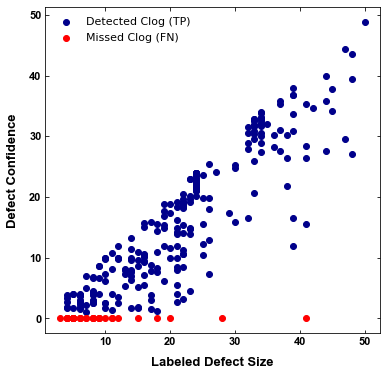

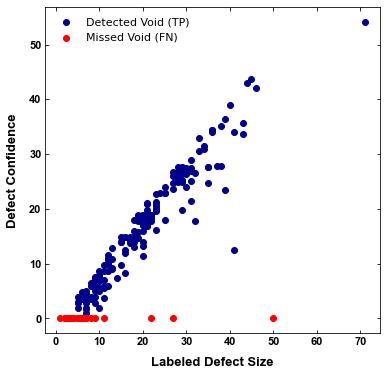

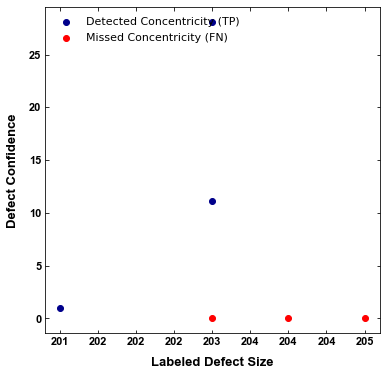

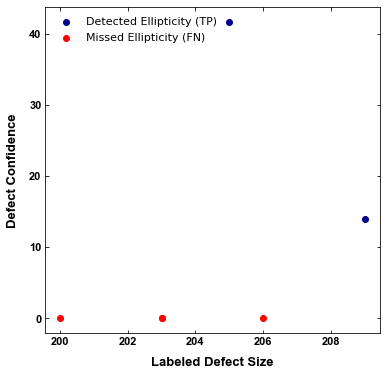

In [109]:
## Plotting the defect detection accuracy
defect_labels = ['Good', 'Clog', 'Void', 'Concentricity', 'Ellipticity']
## Separate for each defect type
false_negative = defect_detection_data[defect_detection_data.defect_confidence == 0]
true_positive = defect_detection_data[defect_detection_data.defect_confidence != 0]

for idx in range(1, 5):
    fig1, ax1 = plt.subplots(figsize=(6, 6))
    ax1.scatter(true_positive[true_positive.defect_label == idx].defect_size, true_positive[true_positive.defect_label == idx].defect_confidence, c='darkblue', label='Detected ' + defect_labels[idx] + ' (TP)')
    ax1.scatter(false_negative[false_negative.defect_label == idx].defect_size, false_negative[false_negative.defect_label == idx].defect_confidence, c='red', label='Missed ' + defect_labels[idx] + ' (FN)')

    ax1.set_xlabel('Labeled Defect Size', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
    ax1.set_ylabel('Defect Confidence', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
    ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
    ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
    ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
    ax1.legend(loc='upper left', fontsize=11, frameon=False)
    ax1.tick_params(direction='in', which='both')
    ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_49472\3071650601.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_49472\3071650601.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


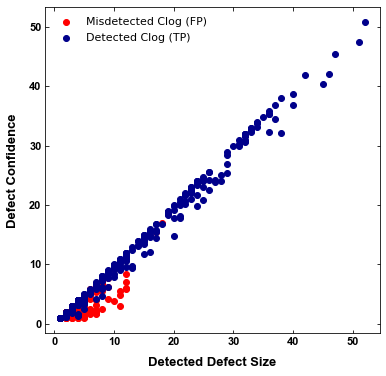

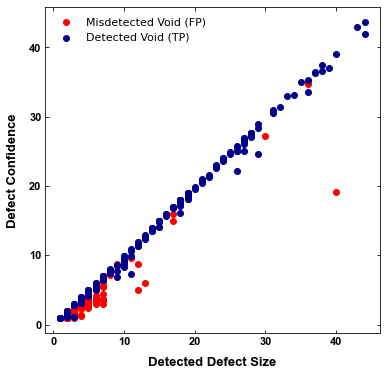

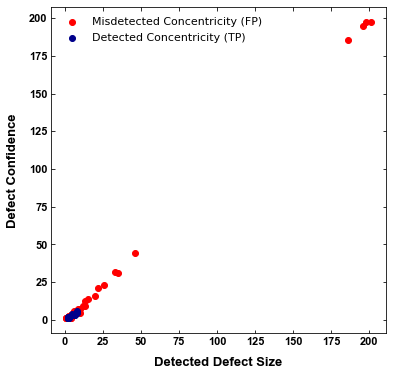

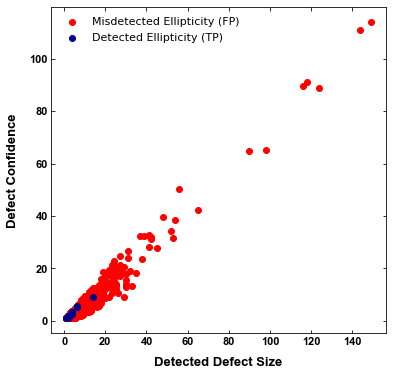

In [110]:
## Plotting the defect detection accuracy
defect_labels = ['Good', 'Clog', 'Void', 'Concentricity', 'Ellipticity']
## Separate for each defect type
false_positive = full_defect_df[full_defect_df.Overlap_With_Real == 0]
true_positive = full_defect_df[full_defect_df.Overlap_With_Real != 0]

for idx in range(1, 5):
    fig1, ax1 = plt.subplots(figsize=(6, 6))
    ax1.scatter(false_positive[false_positive.defect == defect_labels[idx]].width, false_positive[false_positive.defect == defect_labels[idx]].confidence, c='red', label='Misdetected ' + defect_labels[idx] + ' (FP)')
    ax1.scatter(true_positive[true_positive.defect == defect_labels[idx]].width, true_positive[true_positive.defect == defect_labels[idx]].confidence, c='darkblue', label='Detected ' + defect_labels[idx] + ' (TP)')
    
    ax1.set_xlabel('Detected Defect Size', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
    ax1.set_ylabel('Defect Confidence', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
    ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
    ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
    ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
    ax1.legend(loc='upper left', fontsize=11, frameon=False)
    ax1.tick_params(direction='in', which='both')
    ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [111]:
false_negative = defect_detection_data[defect_detection_data.defect_confidence == 0]
true_positive = defect_detection_data[defect_detection_data.defect_confidence != 0]

print(len(true_positive))

false_positive = full_defect_df[full_defect_df.Overlap_With_Real == 0]
#true_positive = full_defect_df[full_defect_df.Overlap_With_Real != 0]

print(len(true_positive))

for idx in range(1, 5):
    print(defect_labels[idx])
    single_defect_tp = true_positive[true_positive.defect_label == idx]
    #single_defect_tp = true_positive[true_positive.defect == defect_labels[idx]]
    tp = len(single_defect_tp)

    print('tp ' + str(tp))

    single_defect_fp = false_positive[false_positive.defect == defect_labels[idx]]
    fp = len(single_defect_fp)

    print('fp ' + str(fp))

    single_defect_fn = false_negative[false_negative.defect_label == idx]
    fn = len(single_defect_fn)
    print('fn ' + str(fn))

    accuracy = (tp + fn) / (tp + fp + fn)
    print('accuracy ' + str(accuracy))
    precision = tp / (tp + fp)
    print('precision ' + str(precision))
    recall = tp / (tp + fn)
    print('recall ' + str(recall))

443
443
Clog
tp 245
fp 372
fn 34
accuracy 0.42857142857142855
precision 0.39708265802269044
recall 0.8781362007168458
Void
tp 193
fp 250
fn 32
accuracy 0.47368421052631576
precision 0.435665914221219
recall 0.8577777777777778
Concentricity
tp 3
fp 82
fn 3
accuracy 0.06818181818181818
precision 0.03529411764705882
recall 0.5
Ellipticity
tp 2
fp 1009
fn 4
accuracy 0.005911330049261084
precision 0.0019782393669634025
recall 0.3333333333333333


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Clog


C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\1229608782.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\1229608782.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


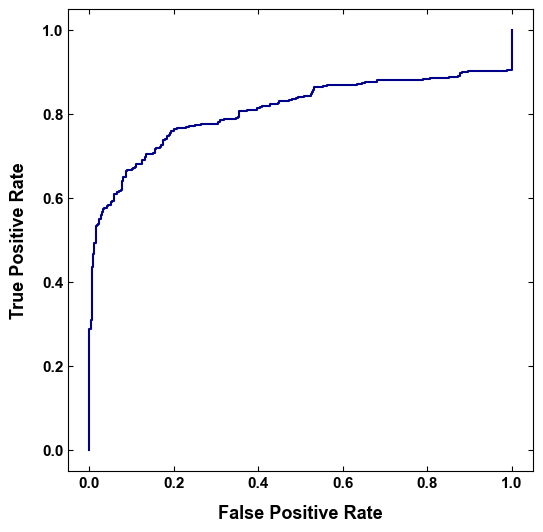

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[        inf 50.80906244 17.85220571 17.00270512 15.43602861 15.39523629
  9.88611029  9.87963807  9.31542284  9.23862623  8.49995287  8.38840142
  7.27503108  7.04033774  6.97443264  6.96018404  6.75464621  6.52112916
  6.2595271   6.25589992  6.12441773  6.10937372  5.93298031  5.88798831
  5.61895182  5.59552758  5.57785898  5.47507137  5.4302878   5.4209859
  5.33172361  5.17894374  4.99481227  4.92406543  4.90679698  4.77825502
  4.42461929  4.40510169  4.37471327  4.1916842   4.16105461  4.11482079
  4.1103741   4.05117201  3.97480942  3.95369249  3.90787901  3.89770605
  3.82924565  3.82641554  3.79239866  3.69854344  3.69052293  3.67800118
  3.67741684  3.64155558  3.60911129  3.56534853  3.55840647  3.41891897
  3.35041666  3.27954021  3.25909152  3.23291915  3.17555843  2.99778954
  2.99718206  2.98770918  2.98050786  2.9748191   2.96857335  2.91540208
  2.89641672  2.8949092   2.82088954  2.76864912  2.72810345  2.72769988
  2.70546177  2.67557846  2.59781989  2.56684221  2.

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\1229608782.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\1229608782.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


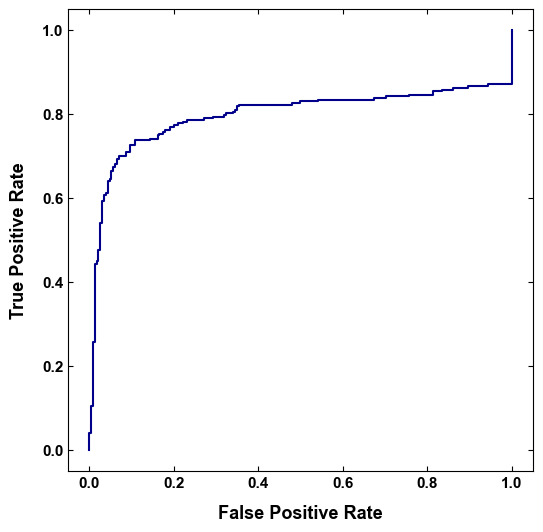

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\1229608782.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\1229608782.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


[        inf 43.67707721 35.36838305 35.12649942 27.33819172 27.22960098
 19.61912298 19.2160505  15.990262   15.98484936 15.73564648 15.02469987
 14.80395596 14.08680894 12.41157423 11.99416161  9.75850742  9.61891043
  8.79906869  8.78657505  8.60135768  8.46799888  7.50643502  7.38352176
  7.34327714  7.16288857  6.91113425  6.71463616  6.50047991  6.17937715
  5.96394075  5.96208053  5.67940239  5.6466125   5.54157483  5.46081156
  5.43226249  5.04788605  4.94462785  4.71242309  4.50918853  4.20241836
  4.16396443  4.03654894  3.9946315   3.98891002  3.95913289  3.88721937
  3.88218151  3.87962927  3.86969593  3.7808023   3.75272235  3.73533198
  3.68781647  3.6224006   3.56057441  3.50869841  3.50815544  3.50359057
  3.49391987  3.26049431  3.25281     3.16427529  3.14627914  3.02514401
  2.99956186  2.98862914  2.98825414  2.91770518  2.89676199  2.8888095
  2.88144227  2.87902111  2.85151174  2.8318722   2.8169545   1.9834495
  1.97609676  1.93696001  1.93335237  1.85004893  1.8

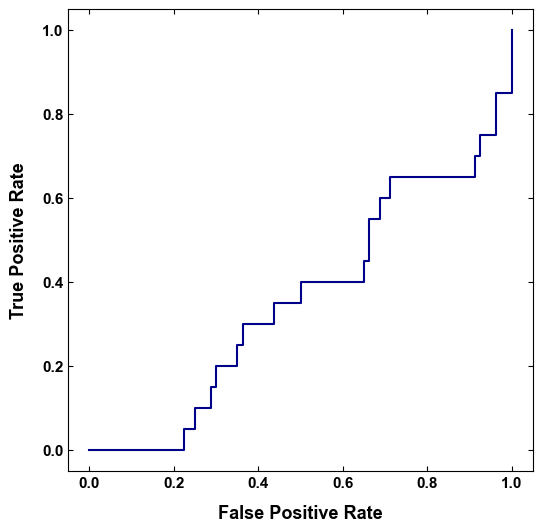

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[         inf 197.5185861    5.86412266   5.86146483   4.90123584
   4.55184702   4.19058101   4.16025366   3.56873593   3.5345156
   3.10745158   3.10097961   2.90508448   2.90306989   2.32125684
   2.16743286   2.0154494    2.01496786   1.68213621   1.65598111
   1.65208124   1.57505045   1.53732362   1.5258478    1.46833222
   1.46699994   1.10489046   1.06950079   1.03518402   1.01574456
   0.98000325   0.95441945   0.92607186   0.        ]
0.3575
Ellipticity


C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\1229608782.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\1229608782.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


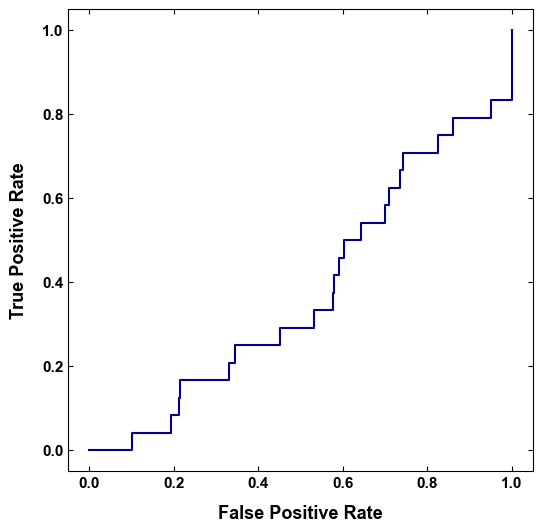

[        inf 89.55897813  9.3168583   9.22178393  5.54237143  5.53754261
  5.20576202  5.19801411  5.18558133  5.16902555  3.56373363  3.55060606
  3.36747247  3.36380441  2.54810025  2.54313218  2.20691404  2.20454367
  1.94229821  1.94080081  1.93768354  1.93052624  1.90671612  1.90552571
  1.85770392  1.85402374  1.74893608  1.74815888  1.59178964  1.58679865
  1.55219779  1.54864174  1.49583007  1.49433272  1.49001186  1.48625424
  1.26032686  1.25552095  1.11443993  1.11373441  0.94195695  0.94063211
  0.90115475  0.        ]
0.3794365166483718


In [246]:
## ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve
confidence_thresholds = np.linspace(0, .5, 100)

false_negative = defect_detection_data[defect_detection_data.defect_confidence == 0]
# true_positive = defect_detection_data[defect_detection_data.defect_confidence != 0]
true_positive = full_defect_df[full_defect_df.Overlap_With_Real != 0]

false_positive = full_defect_df[full_defect_df.Overlap_With_Real == 0]

for idx in range(1,5):

    print(defect_labels[idx])

    # true_positive_single = true_positive[true_positive.defect_label == idx]
    true_positive_single = true_positive[true_positive.defect == defect_labels[idx]]

    false_positive_single = false_positive[false_positive.defect == defect_labels[idx]]

    false_negative_single = false_negative[false_negative.defect_label == idx]

    y_true = []
    y_scores = []

    y_true.extend(np.ones(len(true_positive_single)))
    y_true.extend(np.zeros(len(false_positive_single)))
    y_true.extend(np.ones(len(false_negative_single)))

    # y_scores.extend(np.array(true_positive_single.defect_confidence))
    y_scores.extend(np.array(true_positive_single.confidence))

    y_scores.extend(np.array(false_positive_single.confidence))
    y_scores.extend(np.array(false_negative_single.defect_confidence))

    auc = roc_auc_score(y_true, y_scores)
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)

    fig1, ax1 = plt.subplots(figsize=(6, 6))
    ax1.plot(fpr, tpr, color='darkblue')
    
    ax1.set_xlabel('False Positive Rate', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
    ax1.set_ylabel('True Positive Rate', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
    ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
    ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
    ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
    ax1.legend(loc='upper left', fontsize=11, frameon=False)
    ax1.tick_params(direction='in', which='both')
    ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    
    plt.show()

    print(thresholds)

    print(auc)







In [ ]:
data['Defect'].unique()

In [ ]:
int(441 // 10)

In [247]:
## More segmenting tries

import scipy.special
from matplotlib.ticker import FormatStrFormatter, MultipleLocator

data = pd.read_csv(csv_path + '/' + file_name)
data['Part'] = data.img.str.split('\\').str[-1].str.split('_').str[0]
data['Slice'] = data.img.str.split('\\').str[-1].str.split('_').str[3]
data['Defect'] = data.img.str.split('\\').str[-1].str.split('_').str[2]

#excluded_parts = ['Bending', 'Bending1deg', 'Concentricity', 'Ellipticity', 'Ellipticity250', 'Ellipticity250um', ] #Bending, Concentricity, and Ellipticity
excluded_parts = ['Bending', 'Bending1deg', 'ConeClog1mm', 'RectClog1mm', 'SphereClog1mm', 'CylinderVoid1mm', 'SphereVoid1mm', 'CylinderClog1mm', 'SpikyVoid1mm', 'ConeVoid1mm', 'SpikyClog1mm', 'RectVoid1mm', 'BlobClog1mm', 'BlobVoid1mm']

full_defect_df = pd.DataFrame(columns=['Part', 'Section', 'Good', 'Clog', 'Void', 'Ellipticity', 'Concentricity'])
ground_truth_df = pd.DataFrame(columns=['Part', 'Section', 'Good', 'Clog', 'Void', 'Ellipticity', 'Concentricity'])

defect_labels = ['Good', 'Clog', 'Void', 'Concentricity', 'Ellipticity']

part_list = []

for part in data['Part'].unique():
    part_data = data[data.Part == part]
    if (int(part) >= 32) & (part_data['Defect'].unique()[0] not in excluded_parts): ##Add more of a filter here
        # print(part)
        
        # print(part + ' ' + part_data['Defect'].unique())
        # print('Defect ' + data.Defect[data.Part == part].unique()[0])

        part_list.append(part)

        part_data = part_data.sort_values(by=['Slice'])

        good_signal = part_data['output_0'].values
        clog_signal = part_data['output_1'].values
        void_signal = part_data['output_2'].values
        ellipticity_signal = part_data['output_3'].values
        concentricity_signal = part_data['output_4'].values

        labeled_defect = np.array(part_data.label)

        output = np.array([good_signal, clog_signal, void_signal, ellipticity_signal, concentricity_signal])

        #Add softmax if necessary
        #output = scipy.special.softmax(output, axis=0)
        #Convert logsoftmax to softmax if necessary
        output = np.exp(output)
        # output[np.where(output < 0.5)] = 0 #Filter out low confidence predictions

        ## Max Defect Response of Consecutive Slices

        defect = np.argmax(output, axis=0)

        section_size = 442

        defect_df = pd.DataFrame(columns=['Part', 'Section', 'Good', 'Clog', 'Void', 'Ellipticity', 'Concentricity'])
        part_ground_truth_df = pd.DataFrame(columns=['Part', 'Section', 'Good', 'Clog', 'Void', 'Ellipticity', 'Concentricity'])

        num_slices = len(defect)

        for idx in range(num_slices//section_size):
            section = output[:, idx*section_size:(idx+1)*section_size]
            section_sum = np.sum(section, axis=1)
            defect_df = pd.concat([defect_df, pd.DataFrame({'Part': part, 'Section': idx+1, 'Good': section_sum[0], 'Clog': section_sum[1], 'Void': section_sum[2], 'Ellipticity': section_sum[3], 'Concentricity': section_sum[4]}, index=[0])])
            
            section_label = labeled_defect[idx*section_size:(idx+1)*section_size]
            part_ground_truth_df = pd.concat([part_ground_truth_df, pd.DataFrame({'Part': part, 'Section': idx+1, 'Good': np.sum(section_label == 0), 'Clog': np.sum(section_label == 1), 'Void': np.sum(section_label == 2), 'Ellipticity': np.sum(section_label == 3), 'Concentricity': np.sum(section_label == 4)}, index=[0])])

        full_defect_df = pd.concat([full_defect_df, defect_df])
        ground_truth_df = pd.concat([ground_truth_df, part_ground_truth_df])

full_section_df = pd.DataFrame(columns=['Part', 'Section', 'Good', 'Clog', 'Void', 'Concentricity', 'Ellipticity', 'Good_GT', 'Clog_GT', 'Void_GT', 'Ellipticity_GT', 'Concentricity_GT'])
full_section_df.Part = full_defect_df.Part
full_section_df.Section = full_defect_df.Section
full_section_df.Good = full_defect_df.Good
full_section_df.Clog = full_defect_df.Clog
full_section_df.Void = full_defect_df.Void
full_section_df.Concentricity = full_defect_df.Concentricity
full_section_df.Ellipticity = full_defect_df.Ellipticity
full_section_df.Good_GT = ground_truth_df.Good
full_section_df.Clog_GT = ground_truth_df.Clog
full_section_df.Void_GT = ground_truth_df.Void
full_section_df.Concentricity_GT = ground_truth_df.Concentricity
full_section_df.Ellipticity_GT = ground_truth_df.Ellipticity

In [248]:
full_section_df

,Part,Section,Good,Clog,Void,Concentricity,Ellipticity,Good_GT,Clog_GT,Void_GT,Ellipticity_GT,Concentricity_GT
0,032,1,372.815392,56.345916,1.511134,0.177394,11.150163,418,24,0,0,0
0,033,1,374.068401,55.506726,0.761654,0.312568,11.350650,418,24,0,0,0
0,034,1,373.511469,59.794623,2.488729,0.211774,5.993409,418,24,0,0,0
0,035,1,377.281221,56.289689,1.149466,0.162887,7.116736,418,24,0,0,0
0,036,1,382.871158,48.750971,0.793338,0.177616,9.406917,418,24,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
0,254,1,297.812408,19.708374,3.476326,3.521085,117.481805,442,0,0,0,0
0,255,1,310.105094,43.550768,6.950503,0.801814,80.591821,418,24,0,0,0
0,256,1,302.814743,29.392469,8.314508,2.933398,98.544881,442,0,0,0,0
0,257,1,295.738052,21.543166,3.568678,2.475325,118.674777,442,0,0,0,0


C:\Users\bimrose2\AppData\Local\Temp\ipykernel_49472\3841811170.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_49472\3841811170.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


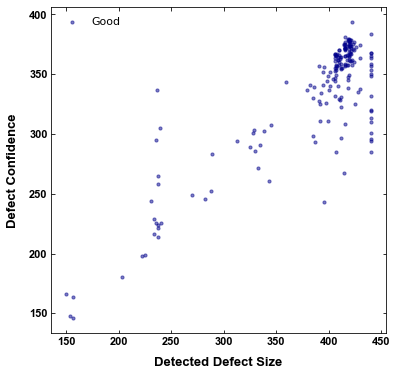

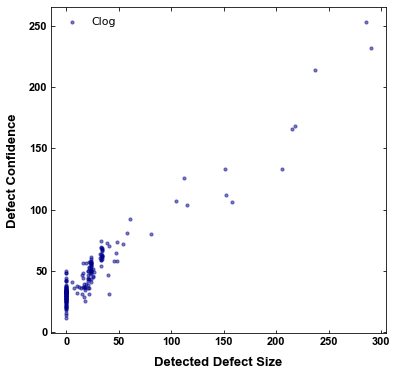

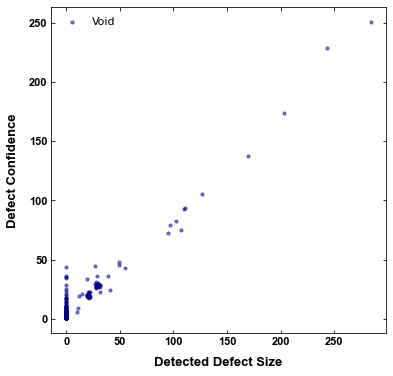

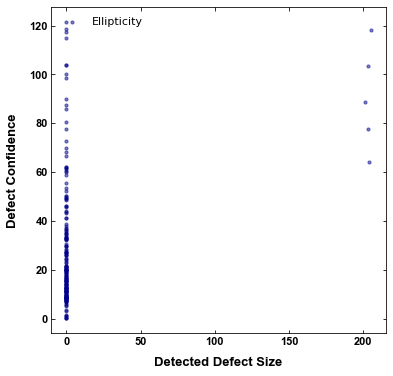

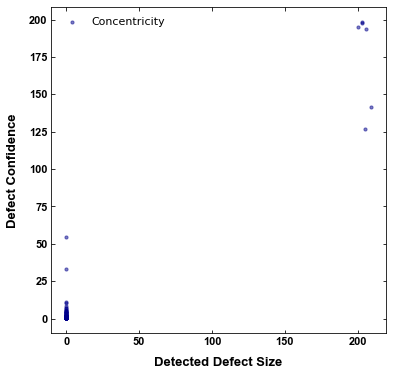

In [175]:
## Plotting the defect detection accuracy
defect_labels = ['Good', 'Clog', 'Void', 'Ellipticity', 'Concentricity']
## Separate for each defect type

for idx in range(0, 5):
    fig1, ax1 = plt.subplots(figsize=(6, 6))
    defect_size = full_section_df[defect_labels[idx]+ '_GT'].values
    defect_confidence = full_section_df[defect_labels[idx]].values

    plt.scatter(defect_size, defect_confidence, c='darkblue', label = defect_labels[idx], alpha=0.5, s=10)

    ax1.set_xlabel('Detected Defect Size', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
    ax1.set_ylabel('Defect Confidence', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
    ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
    ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
    ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
    ax1.legend(loc='upper left', fontsize=11, frameon=False)
    ax1.tick_params(direction='in', which='both')
    ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Good


C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


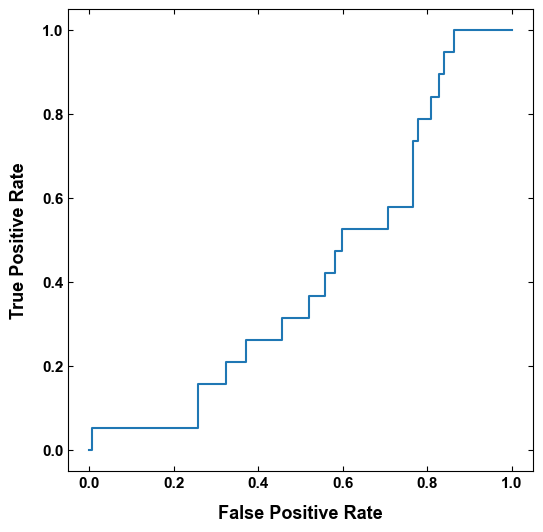

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


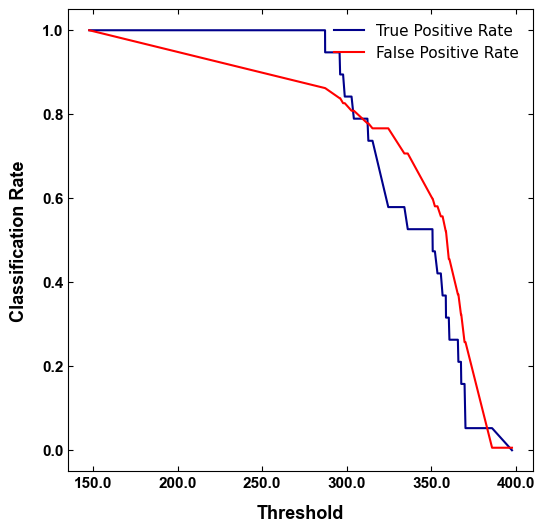

AUC: 0.41853135833595967
Best Threshold=350.691114, G-Mean=0.460


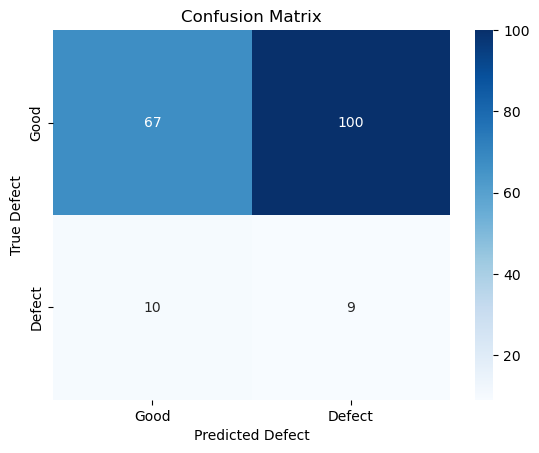

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


accuracy 0.40860215053763443
precision 0.08256880733944955
recall 0.47368421052631576
Clog


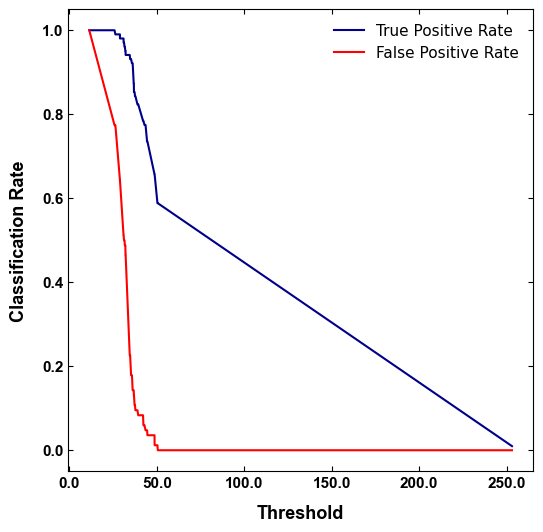

AUC: 0.9410597572362278
Best Threshold=36.193193, G-Mean=0.889


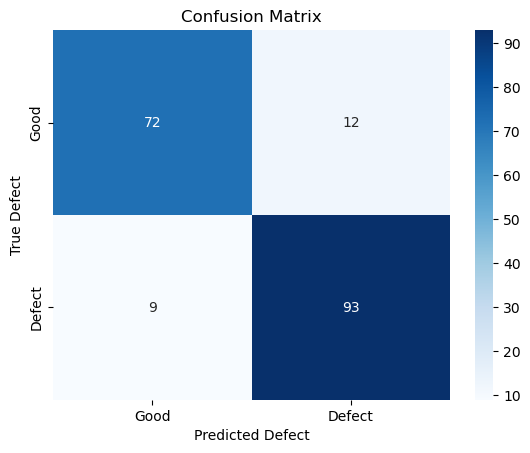

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


accuracy 0.8870967741935484
precision 0.8857142857142857
recall 0.9117647058823529
Void


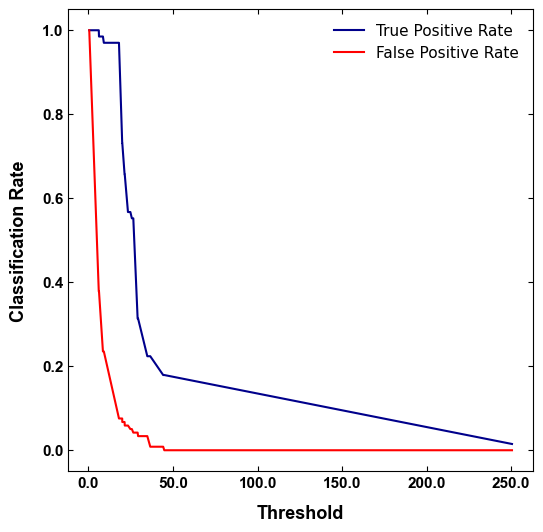

AUC: 0.9483255988962749
Best Threshold=18.070861, G-Mean=0.947


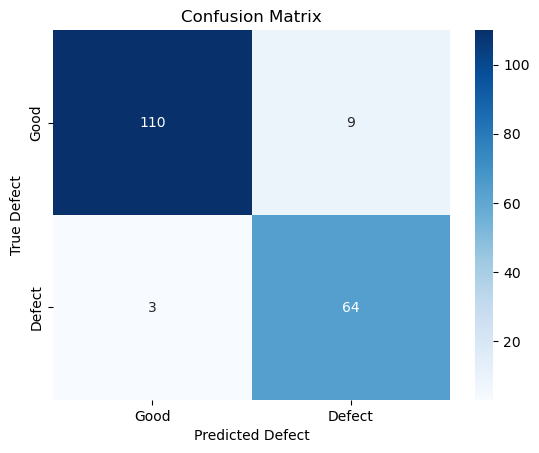

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


accuracy 0.9354838709677419
precision 0.8767123287671232
recall 0.9552238805970149
Concentricity


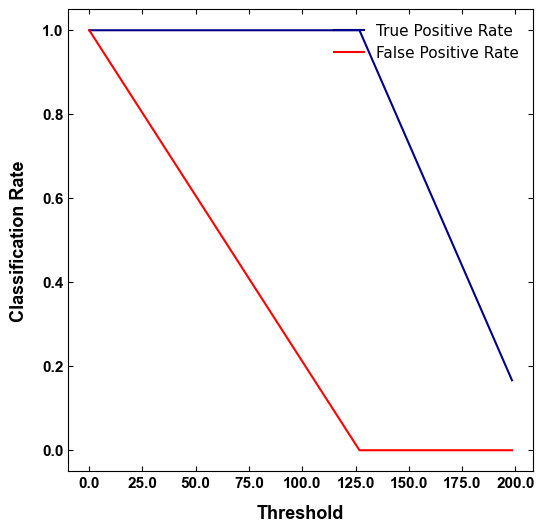

AUC: 1.0
Best Threshold=126.828783, G-Mean=1.000


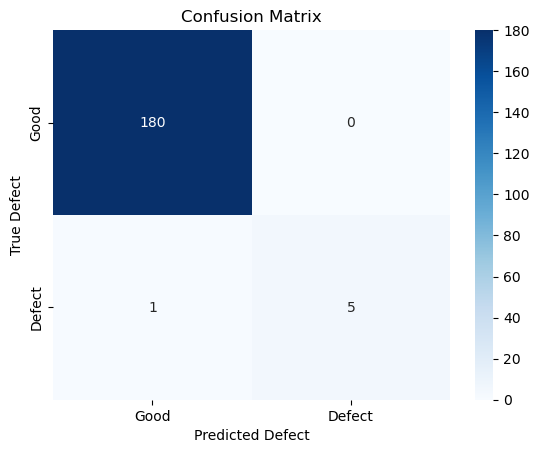

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


accuracy 0.9946236559139785
precision 1.0
recall 0.8333333333333334
Ellipticity


C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\3581848192.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


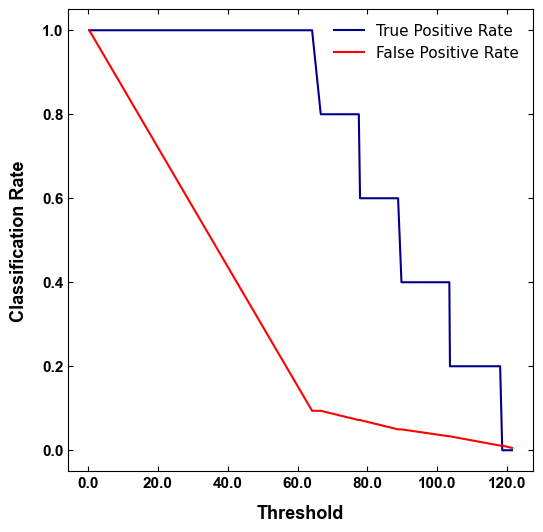

AUC: 0.9480662983425414
Best Threshold=64.161175, G-Mean=0.952


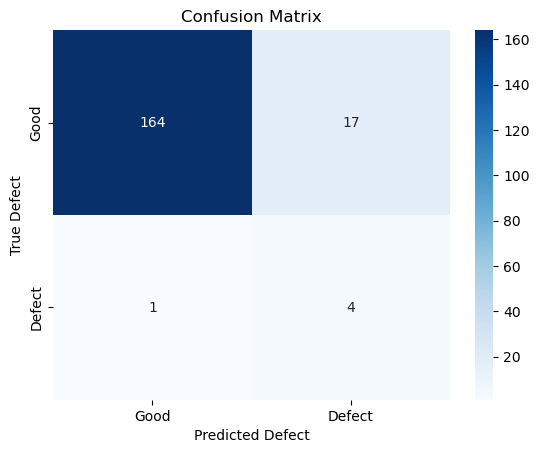

accuracy 0.9032258064516129
precision 0.19047619047619047
recall 0.8


In [249]:
## ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve

fig1, ax1 = plt.subplots(figsize=(6, 6))

for idx in range(0,5):

    print(defect_labels[idx])

    # true_positive_single = true_positive[true_positive.defect_label == idx]
    if idx == 0:
        true_positive_single = full_section_df[defect_labels[idx]][full_section_df[defect_labels[idx] + '_GT'] == section_size]
        false_positive_single = full_section_df[defect_labels[idx]][full_section_df[defect_labels[idx] + '_GT'] < section_size]
    else:
        true_positive_single = full_section_df[defect_labels[idx]][full_section_df[defect_labels[idx] + '_GT'] > 0]
        false_positive_single = full_section_df[defect_labels[idx]][full_section_df[defect_labels[idx] + '_GT'] == 0]

    y_true = []
    y_scores = []

    y_true.extend(np.ones(len(true_positive_single)))
    y_true.extend(np.zeros(len(false_positive_single)))

    # y_scores.extend(np.array(true_positive_single.defect_confidence))
    y_scores.extend(np.array(true_positive_single))

    y_scores.extend(np.array(false_positive_single))

    auc = roc_auc_score(y_true, y_scores)
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)


    ax1.plot(fpr, tpr)
    
    ax1.set_xlabel('False Positive Rate', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
    ax1.set_ylabel('True Positive Rate', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
    ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
    ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
    ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
    ax1.legend(loc='upper left', fontsize=11, frameon=False)
    ax1.tick_params(direction='in', which='both')
    ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    plt.show()

    fig1, ax1 = plt.subplots(figsize=(6, 6))
    ax1.plot(thresholds, tpr, color='darkblue', label='True Positive Rate')
    ax1.plot(thresholds, fpr, color='red', label='False Positive Rate')
    
    ax1.set_xlabel('Threshold', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
    ax1.set_ylabel('Classification Rate', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
    ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
    ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
    ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
    ax1.legend(loc='upper right', fontsize=11, frameon=False)
    ax1.tick_params(direction='in', which='both')
    ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    
    plt.show()

    #print(thresholds)

    print('AUC: ' + str(auc))

    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

    # Create confusion matrix
    y_pred = []
    for i in range(0, len(y_scores)):
        if y_scores[i] > thresholds[ix]:
            y_pred.append(1)
        else:
            y_pred.append(0)
    
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(y_true, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', xticklabels=['Good', 'Defect'], yticklabels=['Good', 'Defect'])

    # Set axis labels and title
    plt.xlabel('Predicted Defect')
    plt.ylabel('True Defect')
    plt.title('Confusion Matrix')

    # Display the plot
    #plt.axis('equal')
    plt.show()

    tp = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[0][0]

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print('accuracy ' + str(accuracy))
    precision = tp / (tp + fp)
    print('precision ' + str(precision))
    recall = tp / (tp + fn)
    print('recall ' + str(recall))





Good
Clog
Void
Concentricity
Ellipticity


C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\408616318.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\408616318.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\408616318.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\408616318.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\

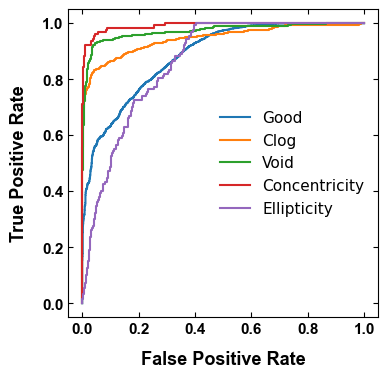

In [224]:
## ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve

fig1, ax1 = plt.subplots(figsize=(4, 4))

for idx in range(0,5):

    print(defect_labels[idx])

    # true_positive_single = true_positive[true_positive.defect_label == idx]
    if idx == 0:
        true_positive_single = full_section_df[defect_labels[idx]][full_section_df[defect_labels[idx] + '_GT'] == section_size]
        false_positive_single = full_section_df[defect_labels[idx]][full_section_df[defect_labels[idx] + '_GT'] < section_size]
    else:
        true_positive_single = full_section_df[defect_labels[idx]][full_section_df[defect_labels[idx] + '_GT'] > 0]
        false_positive_single = full_section_df[defect_labels[idx]][full_section_df[defect_labels[idx] + '_GT'] == 0]

    y_true = []
    y_scores = []

    y_true.extend(np.ones(len(true_positive_single)))
    y_true.extend(np.zeros(len(false_positive_single)))

    # y_scores.extend(np.array(true_positive_single.defect_confidence))
    y_scores.extend(np.array(true_positive_single))

    y_scores.extend(np.array(false_positive_single))

    auc = roc_auc_score(y_true, y_scores)
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)


    ax1.plot(fpr, tpr, label = defect_labels[idx])
    
    ax1.set_xlabel('False Positive Rate', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
    ax1.set_ylabel('True Positive Rate', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
    ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
    ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
    ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
    ax1.legend(loc='upper left', fontsize=11, frameon=False)
    ax1.tick_params(direction='in', which='both')
    ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    # plt.show()

    # fig1, ax1 = plt.subplots(figsize=(6, 6))
    # ax1.plot(thresholds, tpr, color='darkblue', label='True Positive Rate')
    # ax1.plot(thresholds, fpr, color='red', label='False Positive Rate')
    
    # ax1.set_xlabel('Threshold', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
    # ax1.set_ylabel('Classification Rate', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
    # ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
    # ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
    # ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
    # ax1.legend(loc='upper right', fontsize=11, frameon=False)
    # ax1.tick_params(direction='in', which='both')
    # ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    # ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    # ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    # ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    
    # plt.show()

    # #print(thresholds)

    # print('AUC: ' + str(auc))

    # gmeans = np.sqrt(tpr * (1-fpr))
    # ix = np.argmax(gmeans)
    # print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

    # # Create confusion matrix
    # y_pred = []
    # for i in range(0, len(y_scores)):
    #     if y_scores[i] > thresholds[ix]:
    #         y_pred.append(1)
    #     else:
    #         y_pred.append(0)
    
    # from sklearn.metrics import confusion_matrix
    # import seaborn as sns
    # cm = confusion_matrix(y_true, y_pred)

    # # Create a heatmap of the confusion matrix using Seaborn
    # sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', xticklabels=['Good', 'Defect'], yticklabels=['Good', 'Defect'])

    # # Set axis labels and title
    # plt.xlabel('Predicted Defect')
    # plt.ylabel('True Defect')
    # plt.title('Confusion Matrix')

    # # Display the plot
    # #plt.axis('equal')
    # plt.show()

    # tp = cm[1][1]
    # fp = cm[0][1]
    # fn = cm[1][0]
    # tn = cm[0][0]

    # accuracy = (tp + tn) / (tp + tn + fp + fn)
    # print('accuracy ' + str(accuracy))
    # precision = tp / (tp + fp)
    # print('precision ' + str(precision))
    # recall = tp / (tp + fn)
    # print('recall ' + str(recall))
ax1.legend(loc='center right', fontsize=11, frameon=False, ncol=1, bbox_to_anchor=(1.0, .5))

fig1.savefig('Accuracy.svg', format='svg', dpi=300, bbox_inches='tight')




c:\Users\bimrose2\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1123: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Good


C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


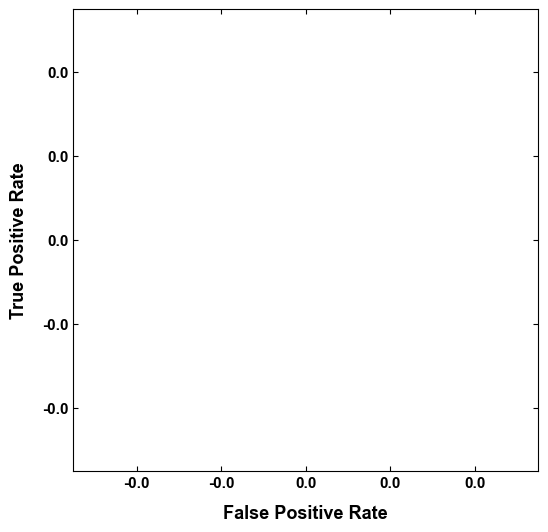

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


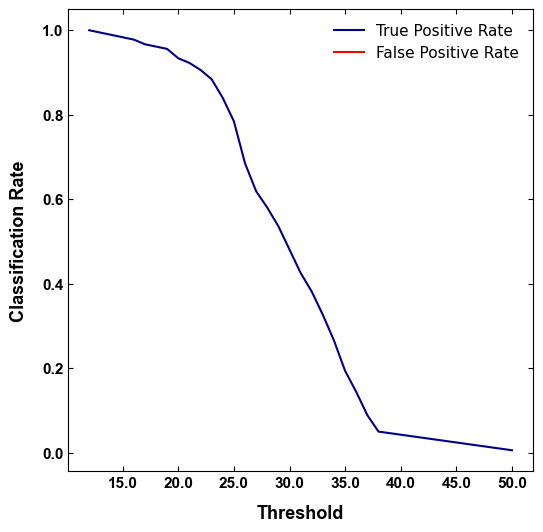

AUC: 0.8850206442558348
Best Threshold: inf


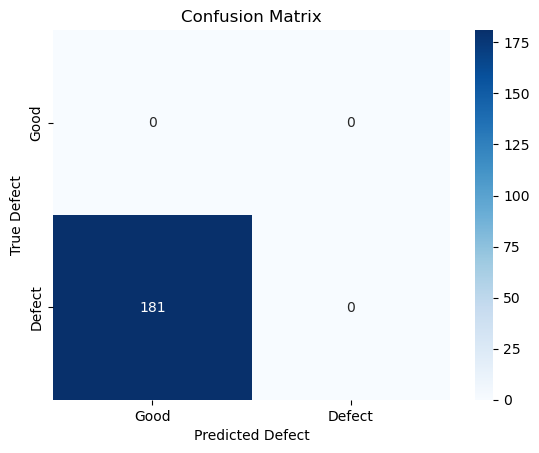

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:150: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


accuracy 0.0
precision nan
recall 0.0
Clog


C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


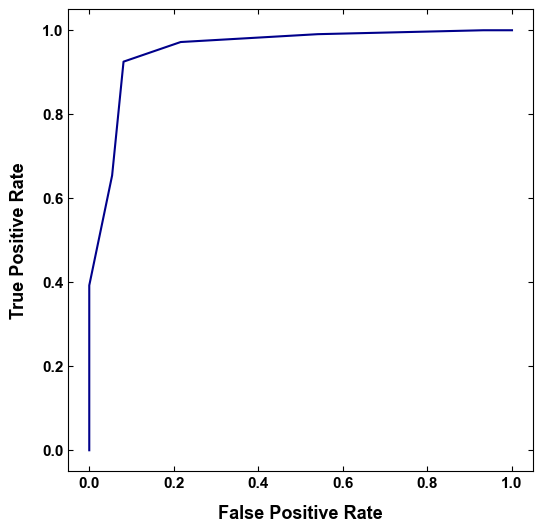

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


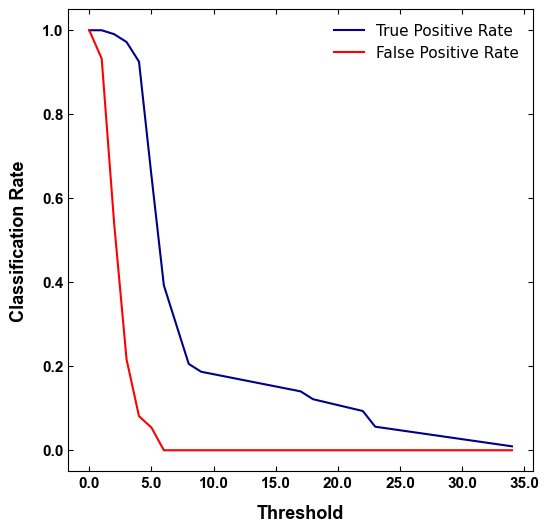

AUC: 0.9453435156787927
Best Threshold: 4.0


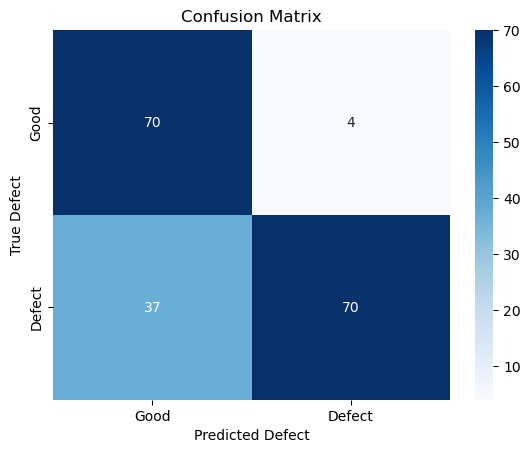

accuracy 0.7734806629834254
precision 0.9459459459459459
recall 0.6542056074766355
Void


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


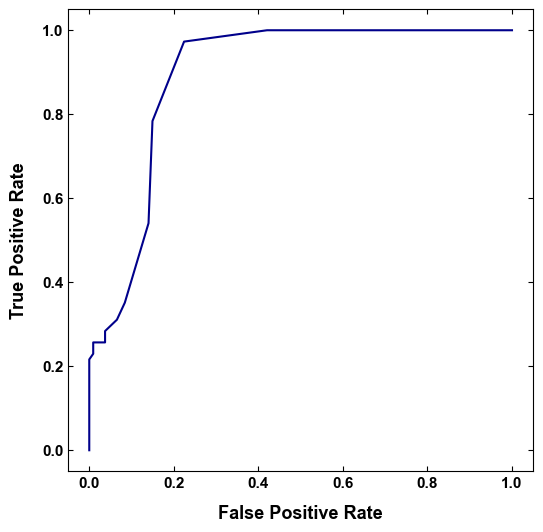

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


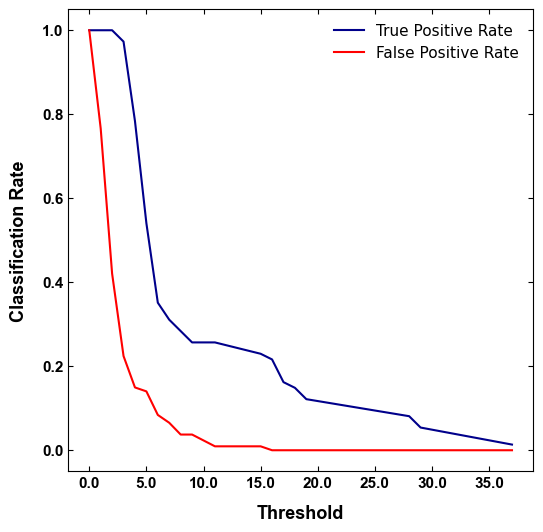

AUC: 0.9722213231273921
Best Threshold: 3.0


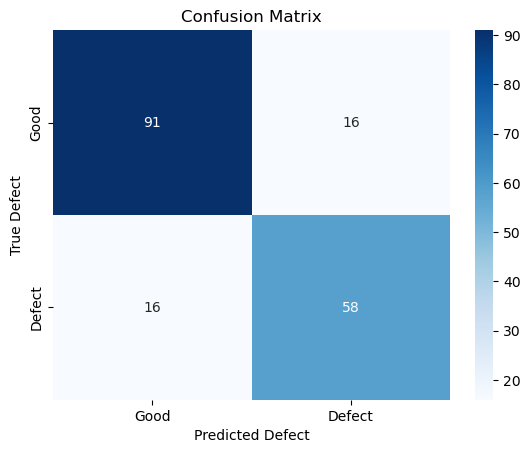

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


accuracy 0.8232044198895028
precision 0.7837837837837838
recall 0.7837837837837838
Concentricity


C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


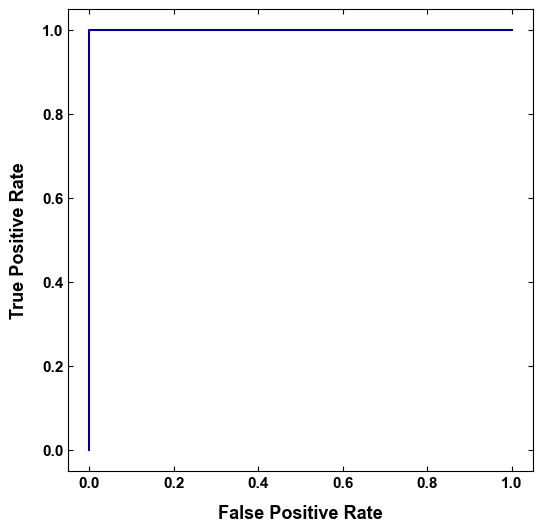

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


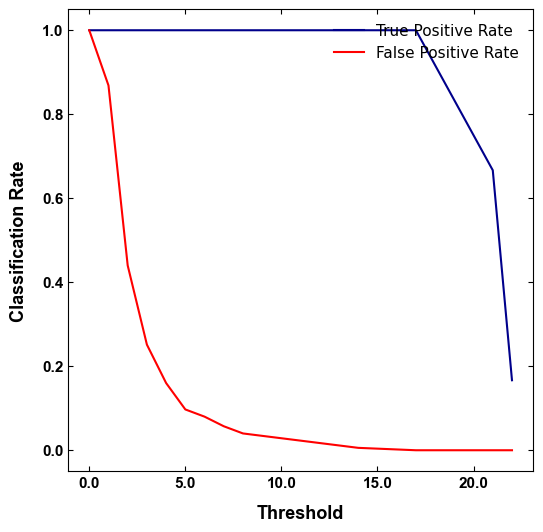

AUC: 0.9914844047921698
Best Threshold: 17.0


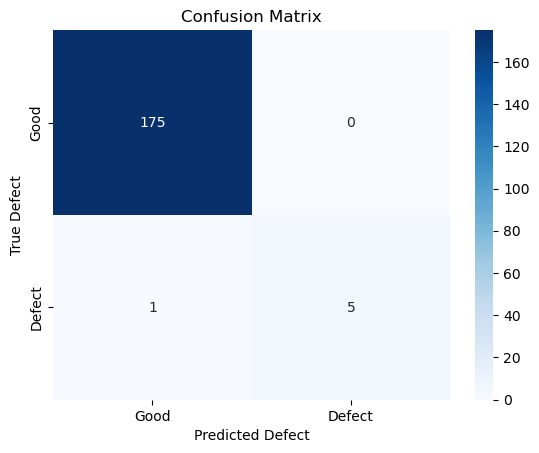

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


accuracy 0.994475138121547
precision 1.0
recall 0.8333333333333334
Ellipticity


C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


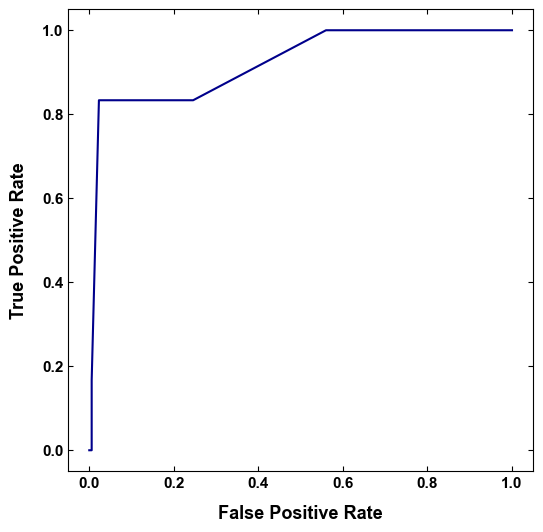

C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
C:\Users\bimrose2\AppData\Local\Temp\ipykernel_3284\2274037909.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')


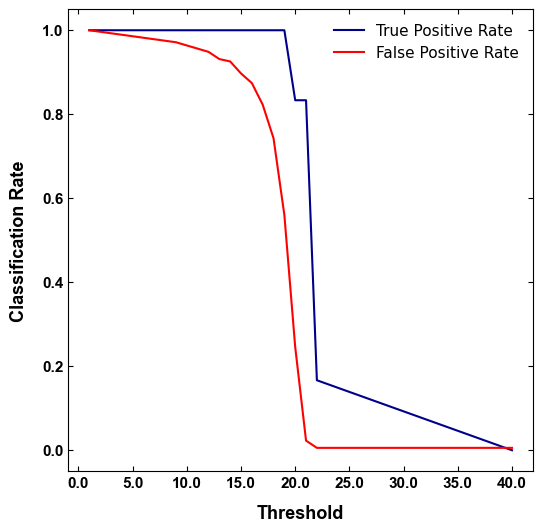

AUC: 0.859575715846907
Best Threshold: 21.0


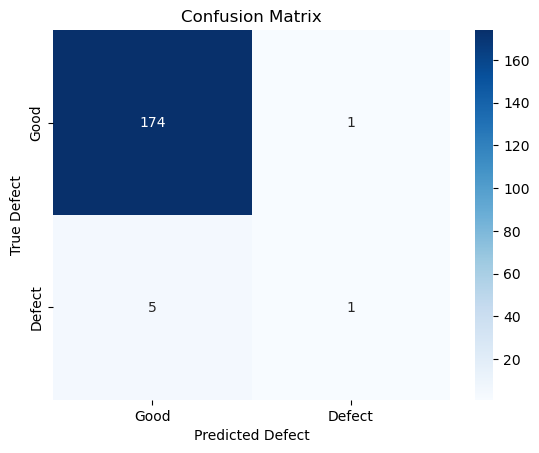

accuracy 0.9668508287292817
precision 0.5
recall 0.16666666666666666


In [225]:
## ROC Curve for part level classification using aggregated section predictions
from sklearn.metrics import roc_auc_score, roc_curve

for idx in range(0,5):

    print(defect_labels[idx])

    # true_positive_single = true_positive[true_positive.defect_label == idx]

    if idx == 0:
        true_positive_single = full_section_df[defect_labels[idx]][full_section_df[defect_labels[idx] + '_GT'] == section_size]
        false_positive_single = full_section_df[defect_labels[idx]][full_section_df[defect_labels[idx] + '_GT'] < section_size]
    else:
        true_positive_single = full_section_df[defect_labels[idx]][full_section_df[defect_labels[idx] + '_GT'] > 0]
        false_positive_single = full_section_df[defect_labels[idx]][full_section_df[defect_labels[idx] + '_GT'] == 0]

    y_true = []
    y_scores = []

    y_true.extend(np.ones(len(true_positive_single)))
    y_true.extend(np.zeros(len(false_positive_single)))

    # y_scores.extend(np.array(true_positive_single.defect_confidence))
    y_scores.extend(np.array(true_positive_single))

    y_scores.extend(np.array(false_positive_single))

    auc = roc_auc_score(y_true, y_scores)
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)

    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    best_threshold = thresholds[ix]

    part_gt = []
    part_scores = []

    for part in full_section_df.Part.unique():
        part_data = full_section_df[full_section_df.Part == part]
        if idx == 0:
            true_positive_single = part_data[defect_labels[idx]][part_data[defect_labels[idx] + '_GT'] == section_size]
            false_positive_single = part_data[defect_labels[idx]][part_data[defect_labels[idx] + '_GT'] < section_size]
        else:
            true_positive_single = part_data[defect_labels[idx]][part_data[defect_labels[idx] + '_GT'] > 0]
            false_positive_single = part_data[defect_labels[idx]][part_data[defect_labels[idx] + '_GT'] == 0]

        y_true = []
        y_scores = []

        y_true.extend(np.ones(len(true_positive_single)))
        y_true.extend(np.zeros(len(false_positive_single)))

        # y_scores.extend(np.array(true_positive_single.defect_confidence))
        y_scores.extend(np.array(true_positive_single))

        y_scores.extend(np.array(false_positive_single))

        y_pred = []
        for i in range(0, len(y_scores)):
            if y_scores[i] > best_threshold:
                y_pred.append(1)
            else:
                y_pred.append(0)
        
        if sum(y_true) > 0:
            part_gt.append(1)
        else:
            part_gt.append(0)
        
        part_scores.append(sum(y_pred))

            
    
    fpr, tpr, thresholds = roc_curve(part_gt, part_scores)

    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    best_threshold = thresholds[ix]

    fig1, ax1 = plt.subplots(figsize=(6, 6))
    ax1.plot(fpr, tpr, color='darkblue')
    
    ax1.set_xlabel('False Positive Rate', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
    ax1.set_ylabel('True Positive Rate', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
    ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
    ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
    ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
    ax1.legend(loc='upper left', fontsize=11, frameon=False)
    ax1.tick_params(direction='in', which='both')
    ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    plt.show()

    fig1, ax1 = plt.subplots(figsize=(6, 6))
    ax1.plot(thresholds, tpr, color='darkblue', label='True Positive Rate')
    ax1.plot(thresholds, fpr, color='red', label='False Positive Rate')
    
    ax1.set_xlabel('Threshold', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
    ax1.set_ylabel('Classification Rate', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
    ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
    ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
    ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
    ax1.legend(loc='upper right', fontsize=11, frameon=False)
    ax1.tick_params(direction='in', which='both')
    ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    
    plt.show()

    print('AUC: ' + str(auc))

    print('Best Threshold: ' + str(best_threshold))

    part_pred = []

    for i in range(0, len(part_scores)):
        if part_scores[i] > best_threshold:
            part_pred.append(1)
        else:
            part_pred.append(0)
    
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(part_gt, part_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', xticklabels=['Good', 'Defect'], yticklabels=['Good', 'Defect'])

    # Set axis labels and title
    plt.xlabel('Predicted Defect')
    plt.ylabel('True Defect')
    plt.title('Confusion Matrix')

    # Display the plot
    #plt.axis('equal')
    plt.show()

    tp = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[0][0]

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print('accuracy ' + str(accuracy))
    precision = tp / (tp + fp)
    print('precision ' + str(precision))
    recall = tp / (tp + fn)
    print('recall ' + str(recall))




In [226]:
false_negative = defect_detection_data[defect_detection_data.defect_confidence == 0]
true_positive = defect_detection_data[defect_detection_data.defect_confidence != 0]

print(len(true_positive))

false_positive = full_defect_df[full_defect_df.Overlap_With_Real == 0]
#true_positive = full_defect_df[full_defect_df.Overlap_With_Real != 0]

print(len(true_positive))

for idx in range(0, 5):
    print(defect_labels[idx])
    single_defect_tp = true_positive[true_positive.defect_label == idx]
    #single_defect_tp = true_positive[true_positive.defect == defect_labels[idx]]
    tp = len(single_defect_tp)

    print('tp ' + str(tp))

    single_defect_fp = false_positive[false_positive.defect == defect_labels[idx]]
    fp = len(single_defect_fp)

    print('fp ' + str(fp))

    single_defect_fn = false_negative[false_negative.defect_label == idx]
    fn = len(single_defect_fn)
    print('fn ' + str(fn))

    accuracy = (tp + fn) / (tp + fp + fn)
    print('accuracy ' + str(accuracy))
    precision = tp / (tp + fp)
    print('precision ' + str(precision))
    recall = tp / (tp + fn)
    print('recall ' + str(recall))

AttributeError: 'DataFrame' object has no attribute 'defect_confidence'

ValueError: All arrays must be of the same length

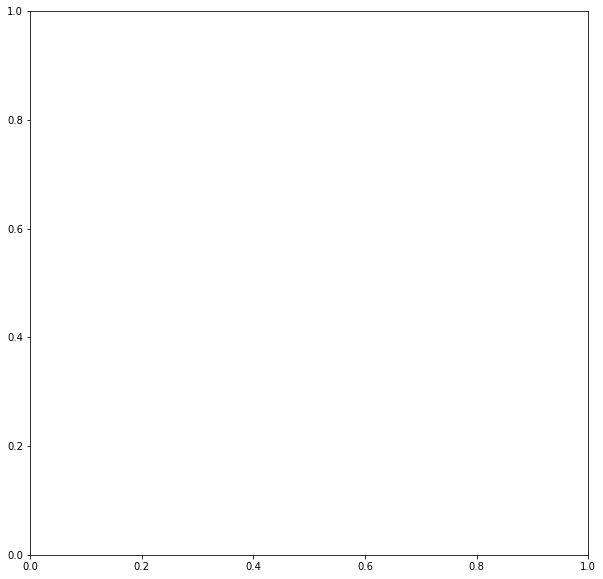

In [27]:
fig1, ax1 = plt.subplots(figsize=(10, 10))

defect_detection_data = pd.DataFrame({'defect_size': defect_size, 'defect_detected_size': defect_detected_size, 'defect_label': defect_label})

ax1.scatter(defect_detection_data[defect_detection_data.defect_label == 1].defect_size, defect_detection_data[defect_detection_data.defect_label == 1].defect_detected_size, c='darkblue', label='Clog')
ax1.scatter(defect_detection_data[defect_detection_data.defect_label == 2].defect_size, defect_detection_data[defect_detection_data.defect_label == 2].defect_detected_size, c='darkorange', label='Void')
ax1.scatter(defect_detection_data[defect_detection_data.defect_label == 3].defect_size, defect_detection_data[defect_detection_data.defect_label == 3].defect_detected_size, c='red', label='Concentricity')
ax1.scatter(defect_detection_data[defect_detection_data.defect_label == 4].defect_size, defect_detection_data[defect_detection_data.defect_label == 4].defect_detected_size, c='green', label='Ellipticity')


ax1.set_xlabel('Labeled Defect Size', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold') 
ax1.set_ylabel('Predicted Defect Slices', fontsize=13, fontfamily='Arial', labelpad=10, fontweight='bold')
ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, right=True, labelright=False, left=True, labelleft=True)
ax1.tick_params(axis="x", which="minor", direction="in", top=True, labeltop=False, bottom=True, labelbottom=False)
ax1.tick_params(axis="y", which="minor", direction="in", right=True, labelright=False, left=True, labelleft=False)
#ax1.ticklabel_format(axis='both', style='plain', scilimits=(0,0))
ax1.legend(loc='upper right', fontsize=11, frameon=False)
#ax1.xaxis.set_minor_locator(MultipleLocator(1))
#ax1.xaxis.set_major_locator(MultipleLocator(2))
#ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1.tick_params(direction='in', which='both')
ax1.set_xticklabels(ax1.get_xticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
ax1.set_yticklabels(ax1.get_yticks(), fontsize=11,  fontfamily='Arial', fontweight='bold')
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
# ax1.set_xlim([-.5, 2.5])
# ax1.set_ylim([0.6, 1])
#ax1.set_aspect('equal', 'box')
ax1.legend(['Clog', 'Void', 'Concentricity', 'Ellipticity'], loc='upper left', fontsize=11, frameon=False)

fig1.savefig('Accuracy.svg', format='svg', dpi=300, bbox_inches='tight')

In [28]:
from scipy.signal import savgol_filter, find_peaks
defect_df = pd.DataFrame(columns=['defect', 'center', 'width', 'confidence'])
defect_labels = ['Good', 'Clog', 'Void', 'Concentricity', 'Ellipticity']

for idp in range(1, 5):

    signal_dict = scipy.signal.find_peaks(output[idp,: ], height=0.5, width=1)
    single_defect_df = pd.DataFrame(columns=['defect', 'center', 'width', 'confidence'])
    for peak_index in range(len(signal_dict[1]['width_heights'])):
        left_start = signal_dict[1]['left_ips'][peak_index]
        right_start = signal_dict[1]['right_ips'][peak_index]
        peak_height = signal_dict[1]['peak_heights'][peak_index]
        single_defect_df = pd.concat([single_defect_df, pd.DataFrame({'defect': [defect_labels[idp]], 'center': [int((right_start + left_start)/2)], 'width': [int(right_start-left_start)], 'confidence': [peak_height]})])

    single_defect_df.sort_values(by=['width'], ascending=False, inplace=True, ignore_index=True)
    step_through_peaks = True
    idn = 0
    if single_defect_df.shape[0] > 1:
        while step_through_peaks:
            overlap_index = single_defect_df[(single_defect_df['center'] > single_defect_df['center'].iloc[idn] - single_defect_df['width'].iloc[idn]/2) & (single_defect_df['center'] < single_defect_df['center'].iloc[idn] + single_defect_df['width'].iloc[idn]/2)].index[1:]
            dominant_peak = single_defect_df.iloc[idn]
            dominant_peak_span = np.arange(int(dominant_peak['center'] - dominant_peak['width']/2), int(dominant_peak['center'] + dominant_peak['width']/2))
            secondary_peaks_span = []
            for index in overlap_index:
                secondary_peaks_span.extend(np.arange(int(single_defect_df['center'].iloc[index] - single_defect_df['width'].iloc[index]/2), int(single_defect_df['center'].iloc[index] + single_defect_df['width'].iloc[index]/2)))
            ## Add peak combinations if this error persists
            if overlap_index.size > 1:
                single_defect_df.drop(overlap_index, inplace=True)
            idn += 1
            if idn == single_defect_df.shape[0]:
                step_through_peaks = False
    defect_df = pd.concat([defect_df, single_defect_df])
    
defect_df.sort_values(by=['confidence'], ascending=False, inplace=True, ignore_index=True)

print(defect_df)

IndexError: single positional indexer is out-of-bounds

In [ ]:
single_defect_df

In [ ]:
defect_loc = np.array(part_data['Slice'][part_data['label'] == 1]).astype(int)
defect_loc

In [ ]:
window_width = 5
smoothed = scipy.signal.savgol_filter(output[2, :], window_width, 3)

plt.plot(range(len(output[2, :])), output[2, :])
plt.plot(range(len(output[2, :])), smoothed)
plt.show()

# scipy.signal.find_peaks_cwt(output[1, :], np.arange(1, 200))
scipy.signal.find_peaks(smoothed, height=0.5, width=3)